
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

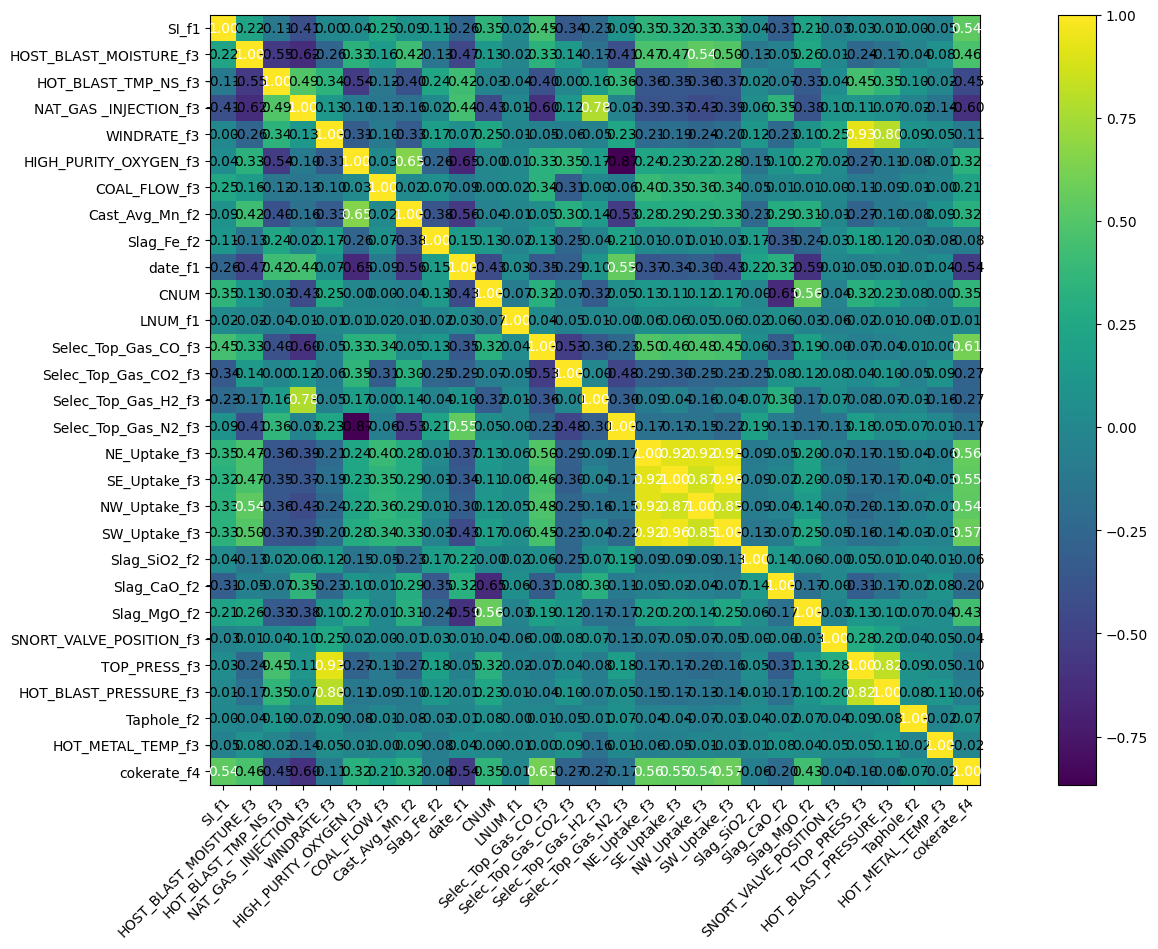

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

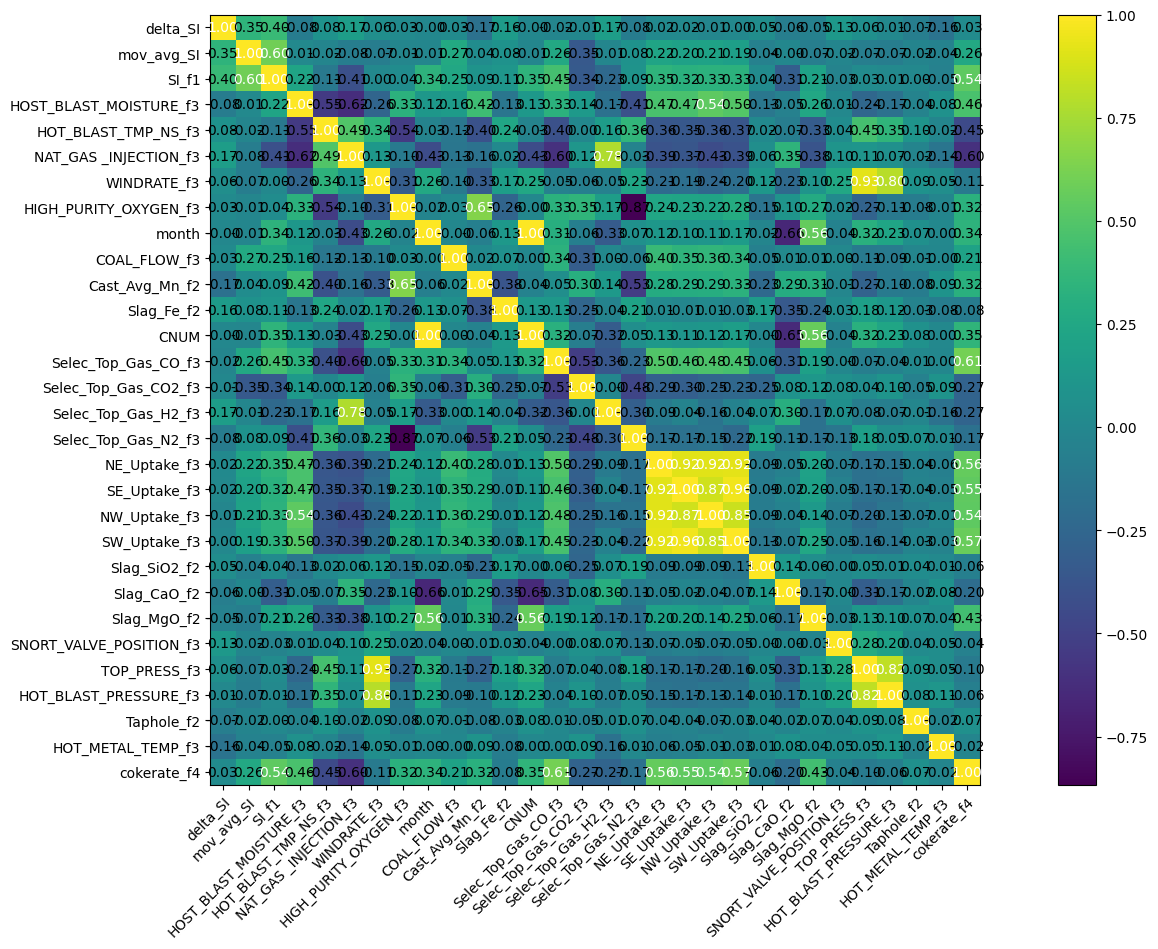

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 0.9
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ## smoothness_loss = F.mse_loss(idx_pred[:, 1:], idx_pred[:, :-1])

        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 100 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test


In [24]:

 inferenceGPT_obj.initialize_preds_lists()



## Run 1


In [25]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.346457
Loss_SI: 1.4086276292800903 Loss_all: 1.3400230407714844
===


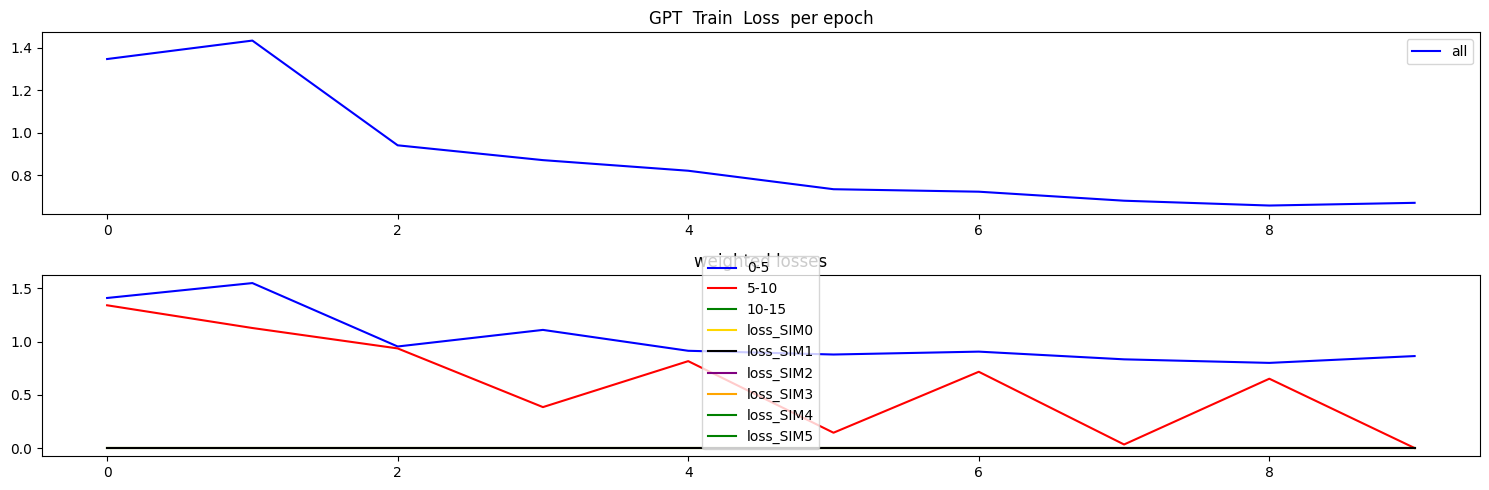

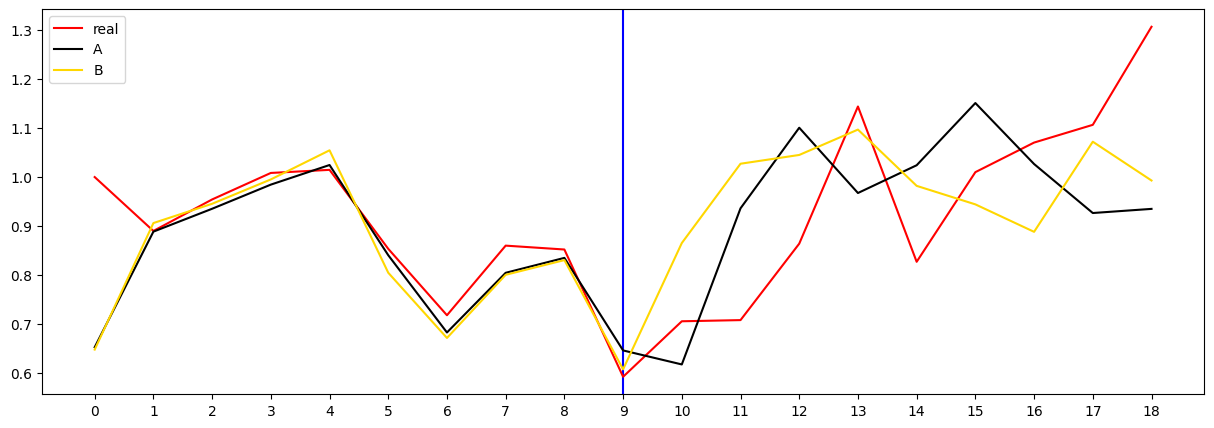

Which prediction is better? (A/B/skip): s


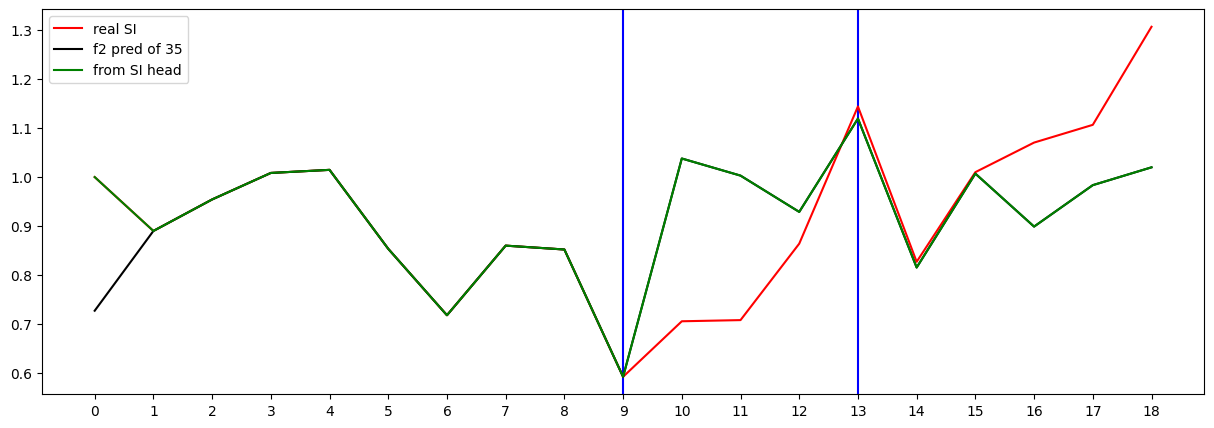

Testing R**2 - (all) - (no inputs):  0.9003852797814532
Testing R**2 - (f2) - SI full (no inputs):  -0.6987192772212207
Testing R**2 - SI head only (no inputs):  -0.6987192772212207
0 ...index R**2 (no inputs):  -0.12315418443292137
1 ...index R**2 (no inputs):  -0.12451906476413144
2 ...index R**2 (no inputs):  -0.6987192772212207
3 ...index R**2 (no inputs):  -5.68090504479522
4 ...index R**2 (no inputs):  -309.69937342317576
5 ...index R**2 (no inputs):  -3.6236550541776644
6 ...index R**2 (no inputs):  -59.29369312492419
7 ...index R**2 (no inputs):  -1012507.5372994425
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22791242902955022
10 ...index R**2 (no inputs):  -2.414149922804399
11 ...index R**2 (no inputs):  -9.474518409426762
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4690245493909155
16 ...index R**2 (no inputs):  -2.4200647559445474
17 ...index R**2 (no inputs

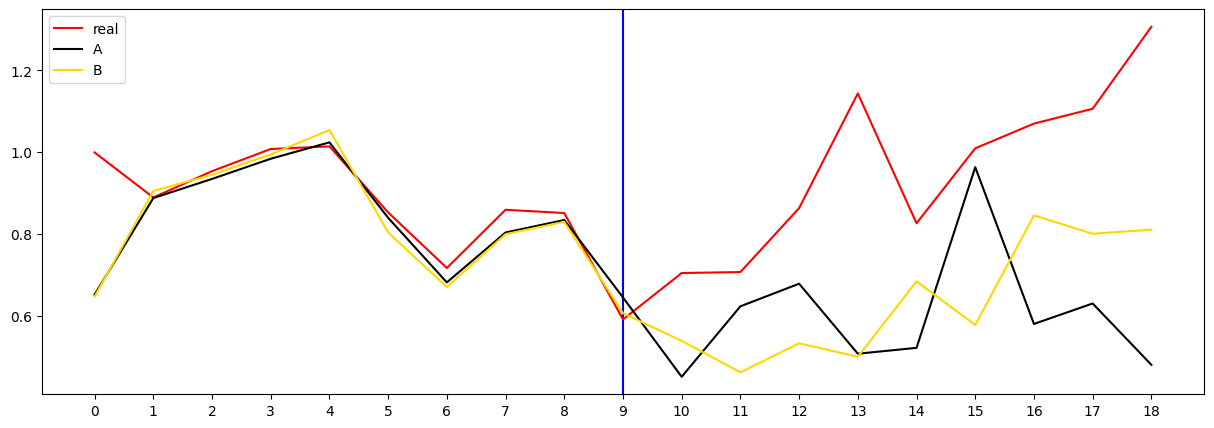

Which prediction is better? (A/B/skip): s


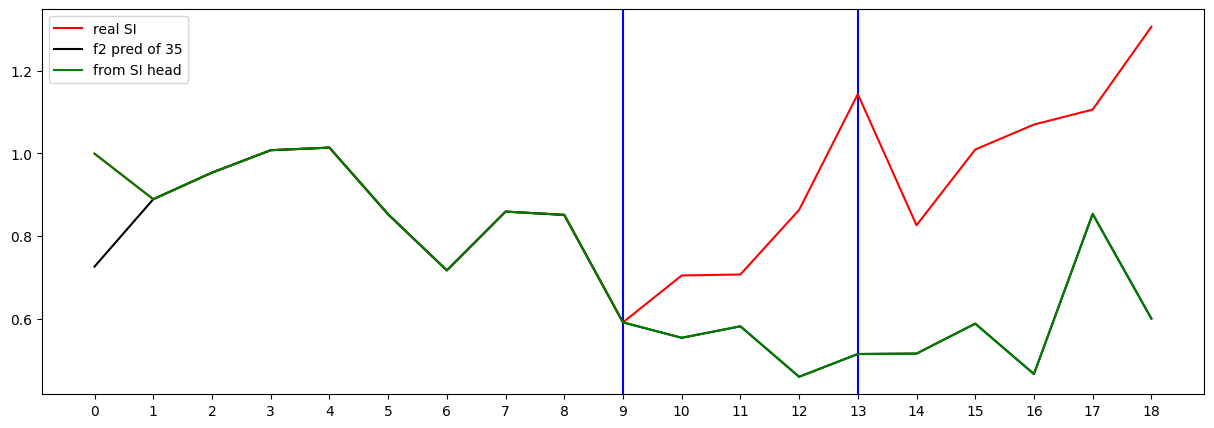

Testing R**2 - (all) - (no inputs):  0.9372245179850179
Testing R**2 - (f2) - SI full (no inputs):  -6.225835267723432
Testing R**2 - SI head only (no inputs):  -6.225835267723432
0 ...index R**2 (no inputs):  -1.3587114803982518
1 ...index R**2 (no inputs):  -4.468560365752911
2 ...index R**2 (no inputs):  -6.225835267723432
3 ...index R**2 (no inputs):  0.2104195288667332
4 ...index R**2 (no inputs):  -230.3559314759974
5 ...index R**2 (no inputs):  -1.9102591839202256
6 ...index R**2 (no inputs):  -196.5984027280861
7 ...index R**2 (no inputs):  -181516.62297168752
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.1147258898721778
10 ...index R**2 (no inputs):  -6.34044738914374
11 ...index R**2 (no inputs):  -275.8590492420076
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.835482066006266
16 ...index R**2 (no inputs):  -9.495264525568745
17 ...index R**2 (no inputs):  -8.8175

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences


res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )



[0] Train Loss: 1.292275
Loss_SI: 1.419873833656311 Loss_all: 1.2855665683746338
===


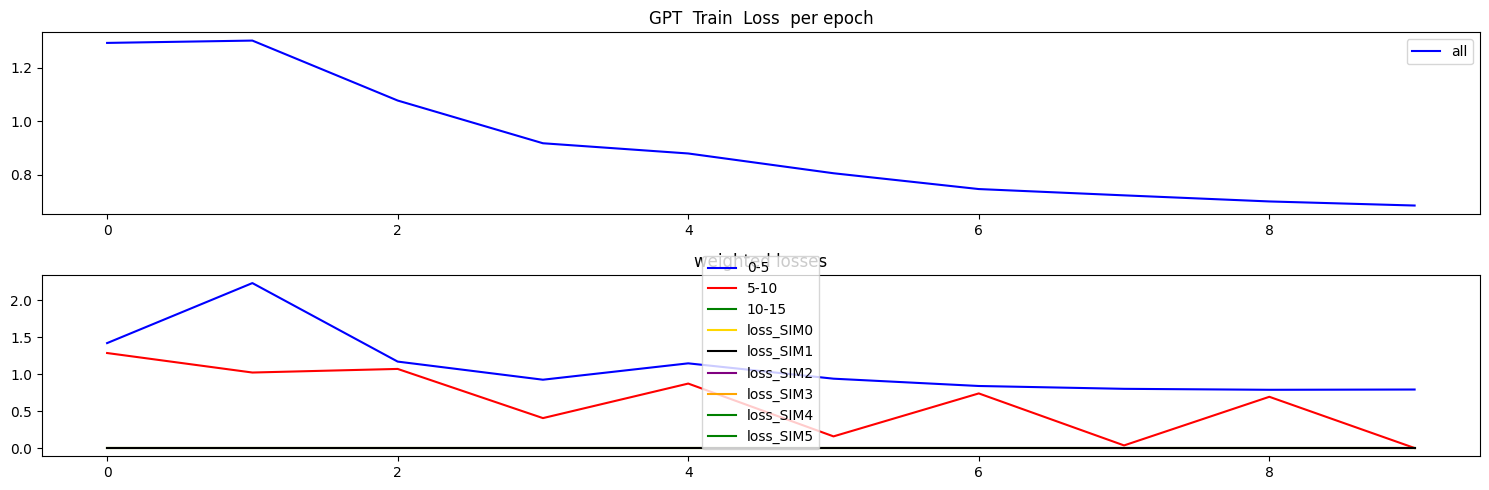

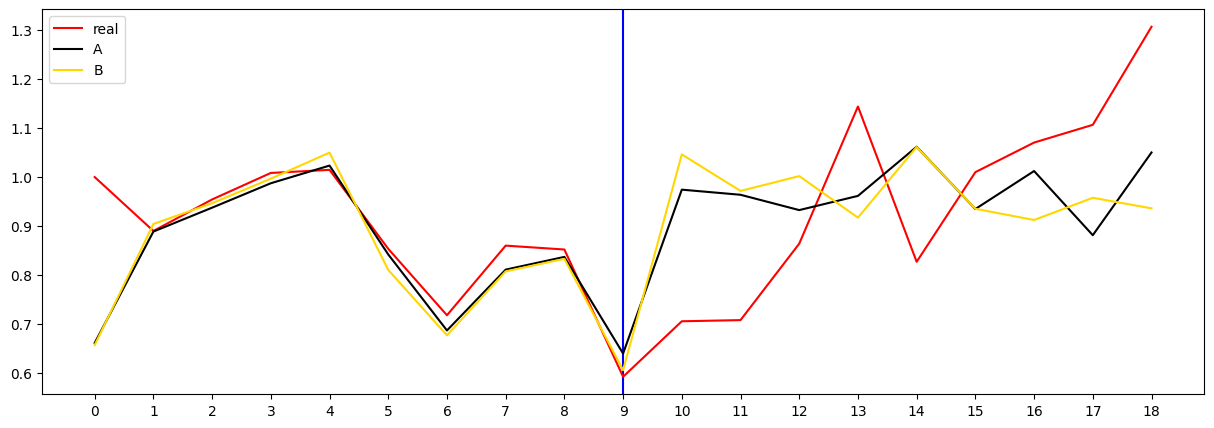

Which prediction is better? (A/B/skip): a
Saved preference.


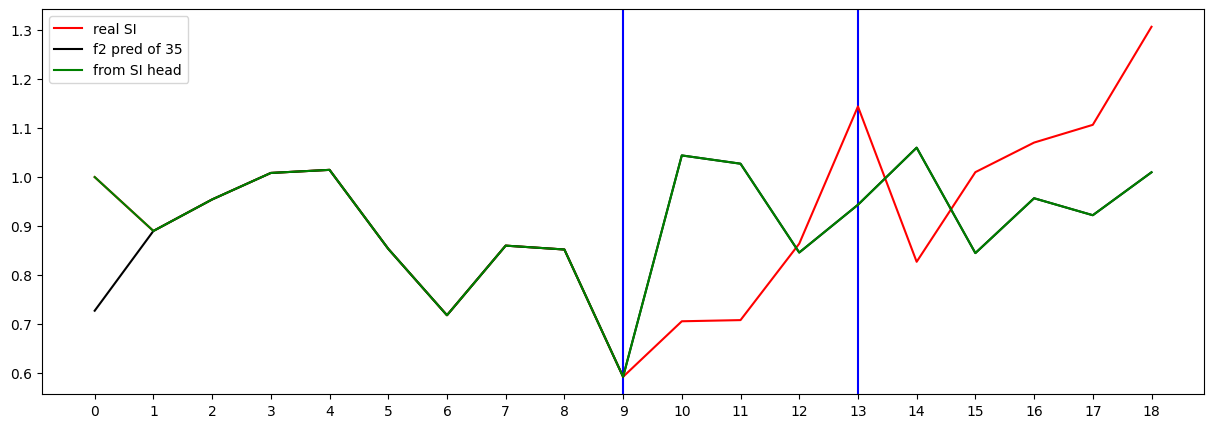

Testing R**2 - (all) - (no inputs):  0.9459179553795437
Testing R**2 - (f2) - SI full (no inputs):  -0.7597729356424237
Testing R**2 - SI head only (no inputs):  -0.7597729356424237
0 ...index R**2 (no inputs):  -0.5082983321652896
1 ...index R**2 (no inputs):  -0.44992201065859794
2 ...index R**2 (no inputs):  -0.7597729356424237
3 ...index R**2 (no inputs):  -3.3201748523569377
4 ...index R**2 (no inputs):  -35.9931918055506
5 ...index R**2 (no inputs):  -1.504110558390722
6 ...index R**2 (no inputs):  -81.16336633738004
7 ...index R**2 (no inputs):  -23853.188443581126
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.39898303690120507
10 ...index R**2 (no inputs):  -1.0070601535655235
11 ...index R**2 (no inputs):  -432.66925766064224
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0549337100830698
16 ...index R**2 (no inputs):  -2.601771461631477
17 ...index R**2 (no inputs)

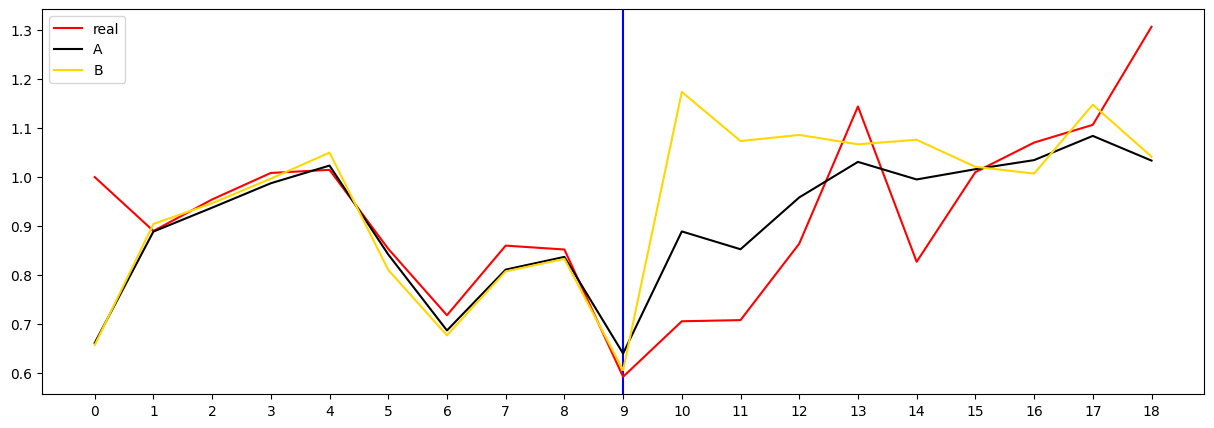

Which prediction is better? (A/B/skip): b
Saved preference.


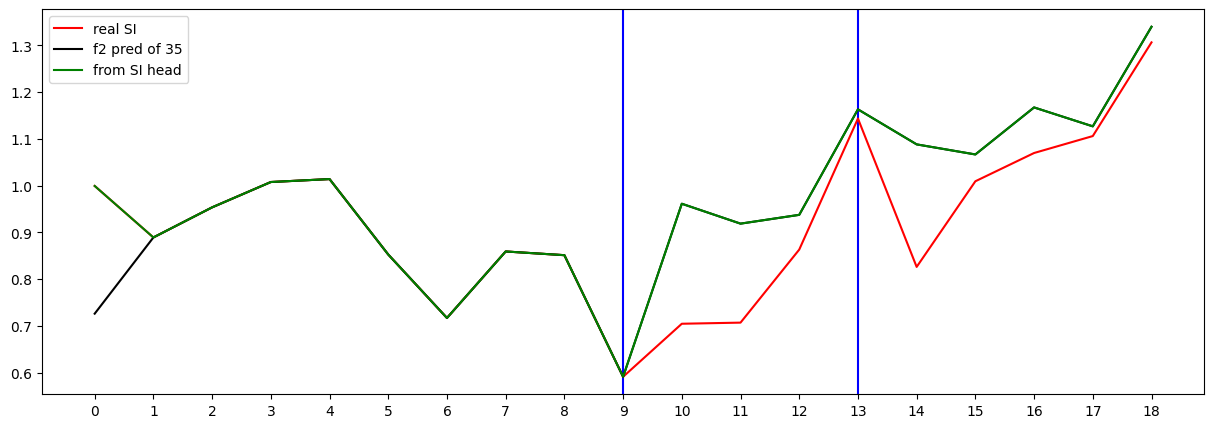

Testing R**2 - (all) - (no inputs):  0.9489520064863463
Testing R**2 - (f2) - SI full (no inputs):  -0.4390992353187051
Testing R**2 - SI head only (no inputs):  -0.4390992353187051
0 ...index R**2 (no inputs):  0.03799406133765826
1 ...index R**2 (no inputs):  -0.21500574096960956
2 ...index R**2 (no inputs):  -0.4390992353187051
3 ...index R**2 (no inputs):  -2.709788218918253
4 ...index R**2 (no inputs):  -944.7748555206373
5 ...index R**2 (no inputs):  -1.3557249524953279
6 ...index R**2 (no inputs):  -81.50563452475143
7 ...index R**2 (no inputs):  -1380070.4680177425
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0012916109703602352
10 ...index R**2 (no inputs):  -4.833737709724183
11 ...index R**2 (no inputs):  -60.662936972811664
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -12.403799490681436
16 ...index R**2 (no inputs):  -18.59647632802154
17 ...index R**2 (no input

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




[0] Train Loss: 1.351600
Loss_SI: 1.4988807439804077 Loss_all: 1.3450170755386353
===


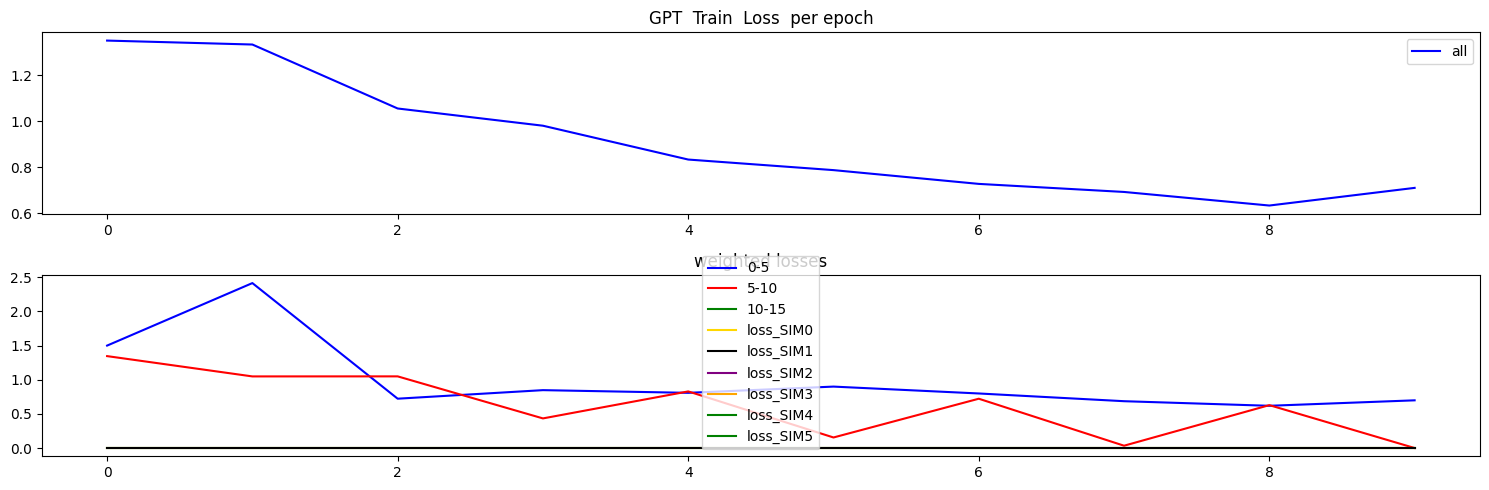

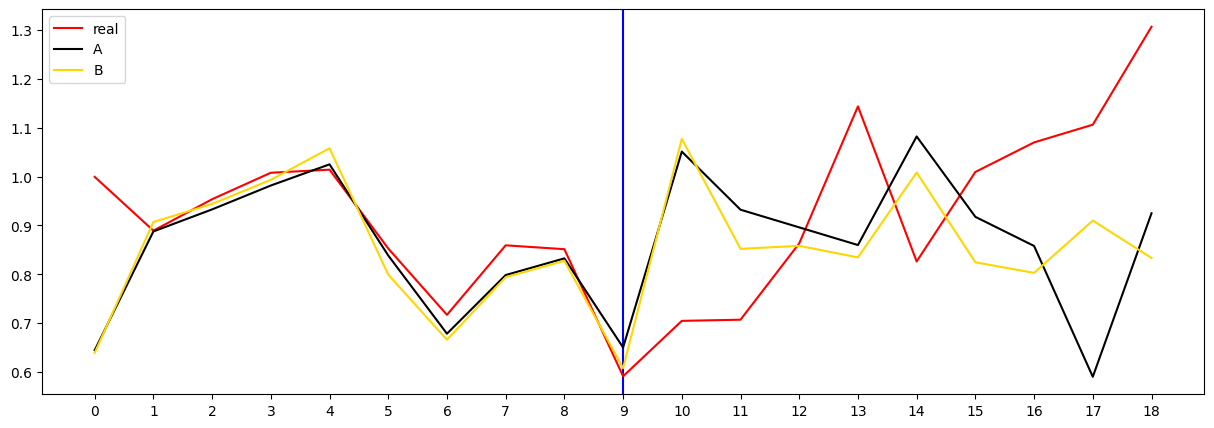

Which prediction is better? (A/B/skip): s


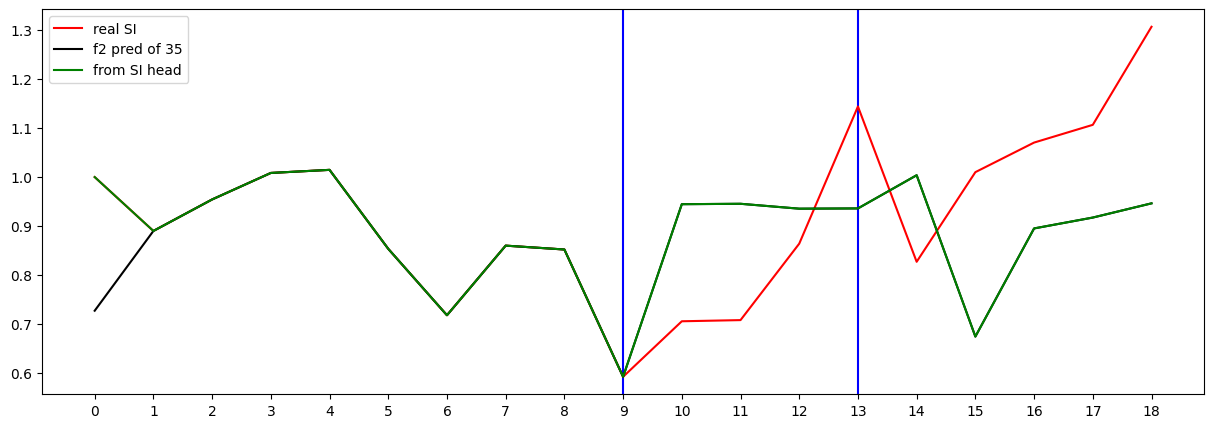

Testing R**2 - (all) - (no inputs):  0.9084541465087584
Testing R**2 - (f2) - SI full (no inputs):  -0.7905544021218014
Testing R**2 - SI head only (no inputs):  -0.7905544021218014
0 ...index R**2 (no inputs):  -0.286101959634264
1 ...index R**2 (no inputs):  -4.817235406867257
2 ...index R**2 (no inputs):  -0.7905544021218014
3 ...index R**2 (no inputs):  -12.334167600697517
4 ...index R**2 (no inputs):  -190.86756383217391
5 ...index R**2 (no inputs):  -3.2455107256814015
6 ...index R**2 (no inputs):  -152.94322331329172
7 ...index R**2 (no inputs):  -30416.429623503875
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08988366734300812
10 ...index R**2 (no inputs):  -0.34017347247744145
11 ...index R**2 (no inputs):  -490.83665570145286
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.5455000544208004
16 ...index R**2 (no inputs):  -5.360180141403572
17 ...index R**2 (no input

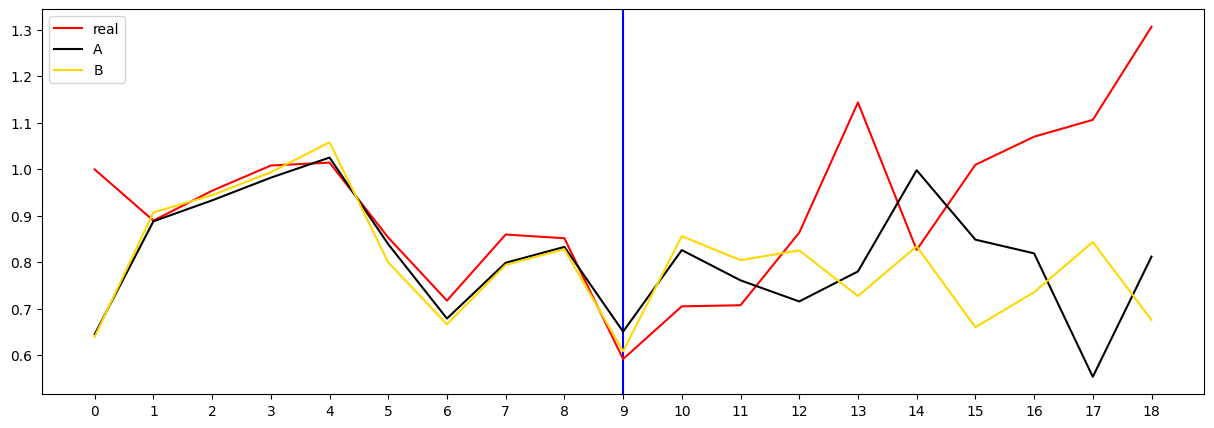

Which prediction is better? (A/B/skip): s


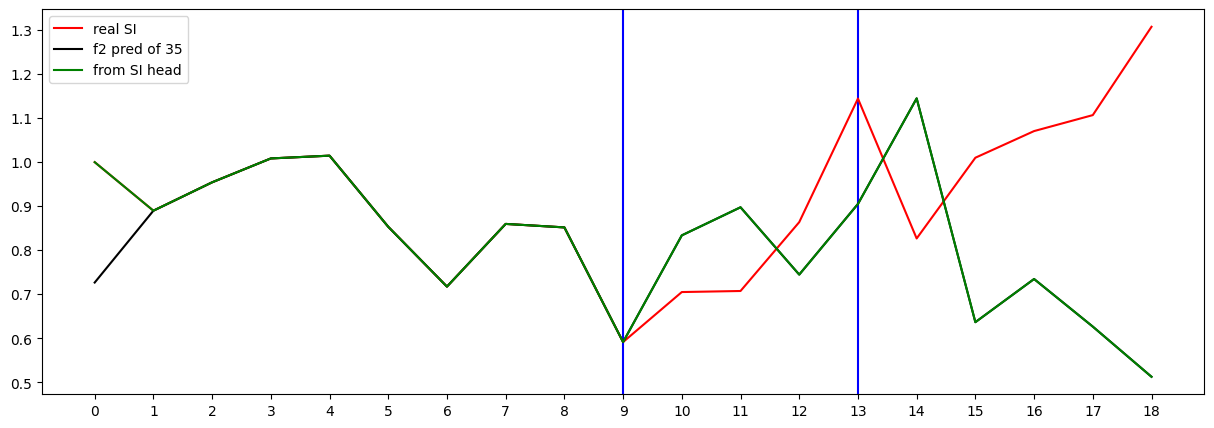

Testing R**2 - (all) - (no inputs):  0.9615049200574561
Testing R**2 - (f2) - SI full (no inputs):  -3.6229661037799907
Testing R**2 - SI head only (no inputs):  -3.6229661037799907
0 ...index R**2 (no inputs):  -2.3666956035063484
1 ...index R**2 (no inputs):  -7.409232125339948
2 ...index R**2 (no inputs):  -3.6229661037799907
3 ...index R**2 (no inputs):  -7.203806677388808
4 ...index R**2 (no inputs):  -1593.1313207625872
5 ...index R**2 (no inputs):  -0.7766006489218042
6 ...index R**2 (no inputs):  -312.60513830061944
7 ...index R**2 (no inputs):  -202460.53132427228
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.028916086739555036
10 ...index R**2 (no inputs):  -4.542058710267486
11 ...index R**2 (no inputs):  -1143.164080785253
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.018540160717801735
16 ...index R**2 (no inputs):  -4.777216266110497
17 ...index R**2 (no input

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.289981
Loss_SI: 1.3343708515167236 Loss_all: 1.283360242843628
===


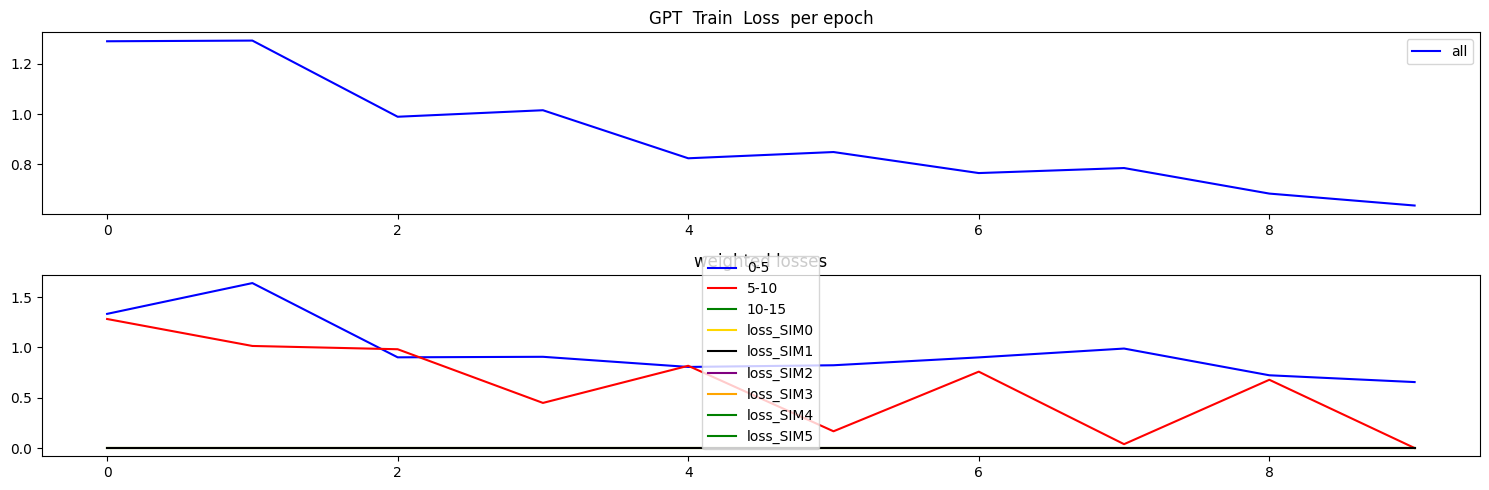

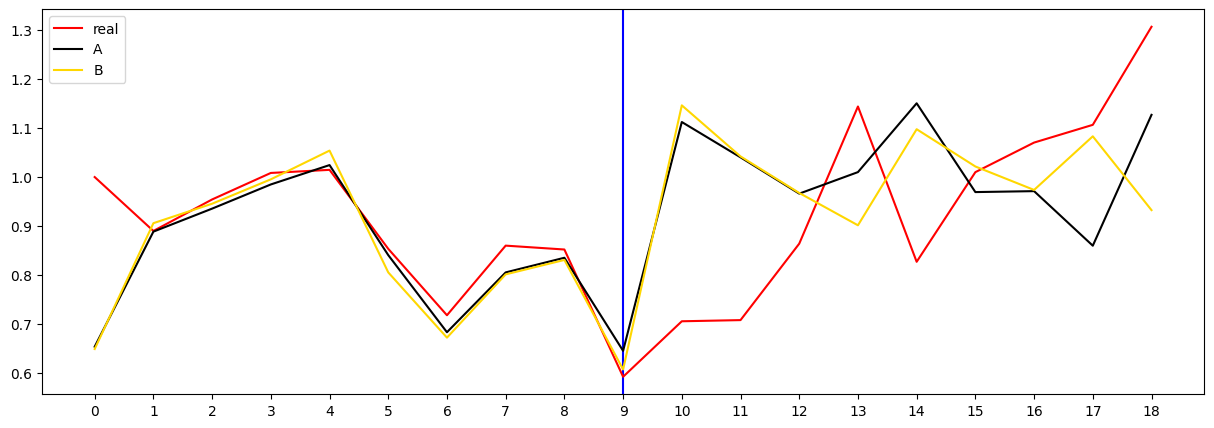

Which prediction is better? (A/B/skip): s


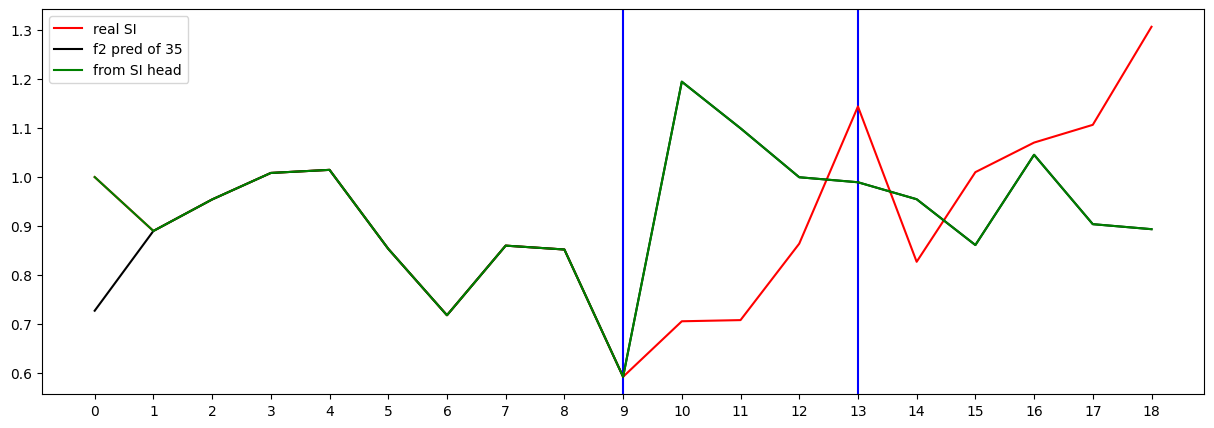

Testing R**2 - (all) - (no inputs):  0.8671257212593324
Testing R**2 - (f2) - SI full (no inputs):  -1.129044092504948
Testing R**2 - SI head only (no inputs):  -1.129044092504948
0 ...index R**2 (no inputs):  -0.29977115952852595
1 ...index R**2 (no inputs):  -2.7311027483505512
2 ...index R**2 (no inputs):  -1.129044092504948
3 ...index R**2 (no inputs):  -19.537508408538013
4 ...index R**2 (no inputs):  -1619.7614698184054
5 ...index R**2 (no inputs):  -5.161502172232258
6 ...index R**2 (no inputs):  -155.43342841803127
7 ...index R**2 (no inputs):  -70619.8199632911
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14034032769429494
10 ...index R**2 (no inputs):  -1.186416928897334
11 ...index R**2 (no inputs):  -207.222356613152
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.349594336615051
16 ...index R**2 (no inputs):  -2.5853281589990997
17 ...index R**2 (no inputs):  -3

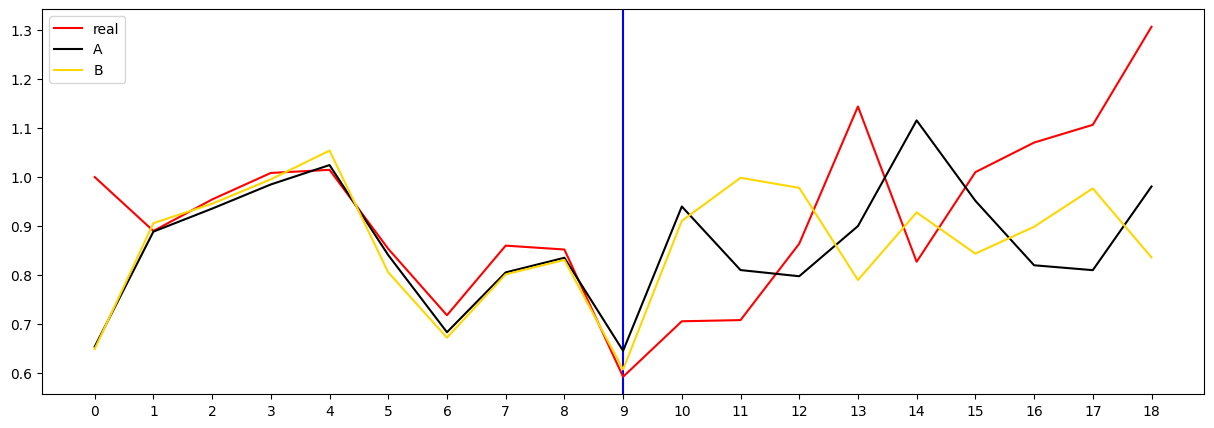

Which prediction is better? (A/B/skip): s


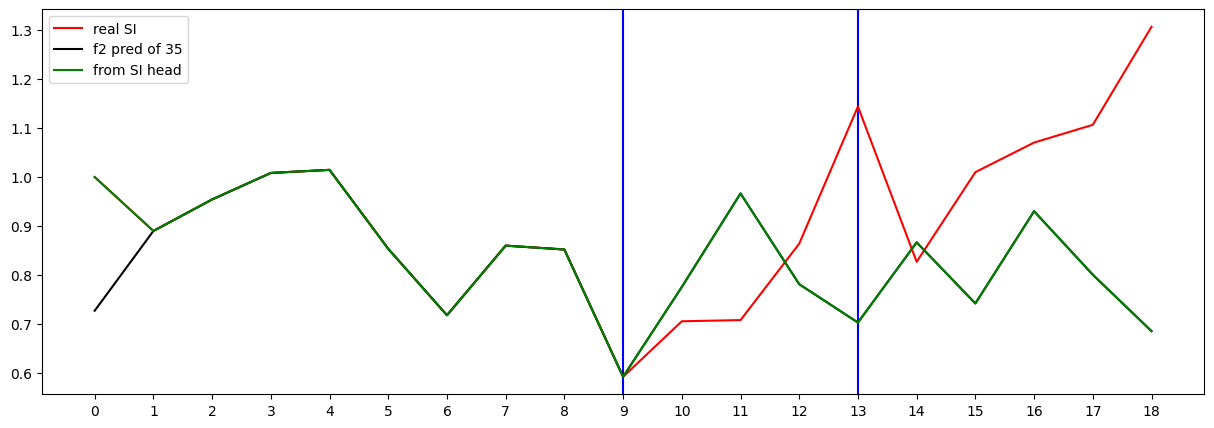

Testing R**2 - (all) - (no inputs):  0.9833170120221887
Testing R**2 - (f2) - SI full (no inputs):  -1.555287455189263
Testing R**2 - SI head only (no inputs):  -1.555287455189263
0 ...index R**2 (no inputs):  -1.577647867942365
1 ...index R**2 (no inputs):  -8.675441884773821
2 ...index R**2 (no inputs):  -1.555287455189263
3 ...index R**2 (no inputs):  -4.939576206293685
4 ...index R**2 (no inputs):  -8682.398380824692
5 ...index R**2 (no inputs):  0.2446051462218809
6 ...index R**2 (no inputs):  -319.6472970405293
7 ...index R**2 (no inputs):  -277809.7060089749
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.17976445938822871
10 ...index R**2 (no inputs):  -5.3946227305703935
11 ...index R**2 (no inputs):  -493.9004587897009
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5762576236647761
16 ...index R**2 (no inputs):  -0.570355295019503
17 ...index R**2 (no inputs):  -798.8

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.366696
Loss_SI: 1.4797700643539429 Loss_all: 1.360102653503418
===


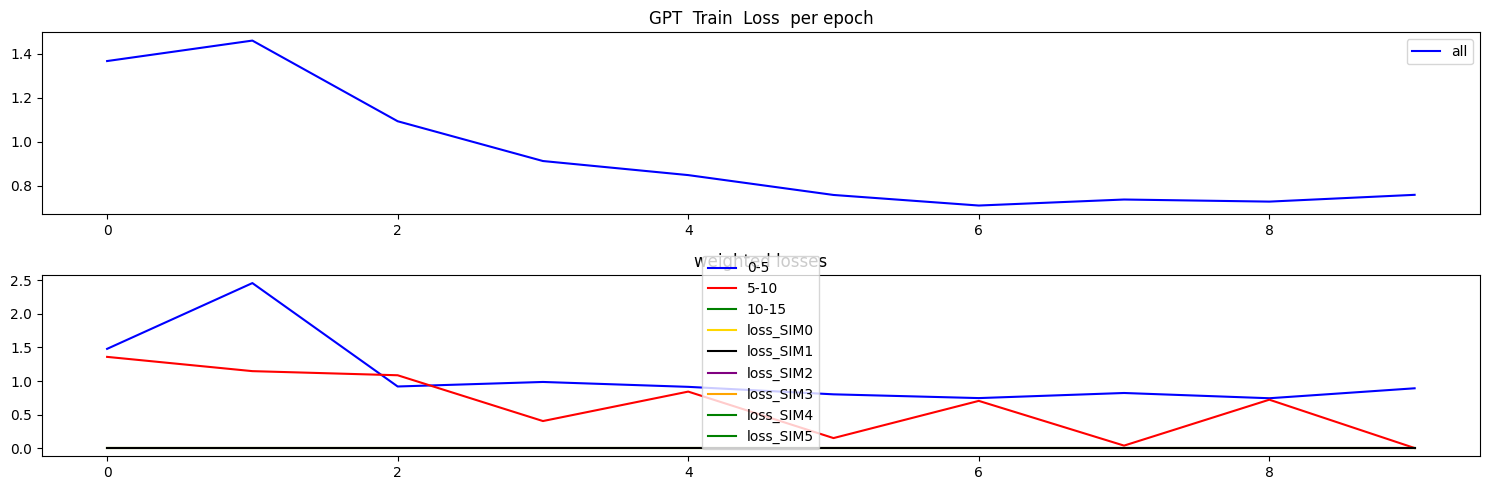

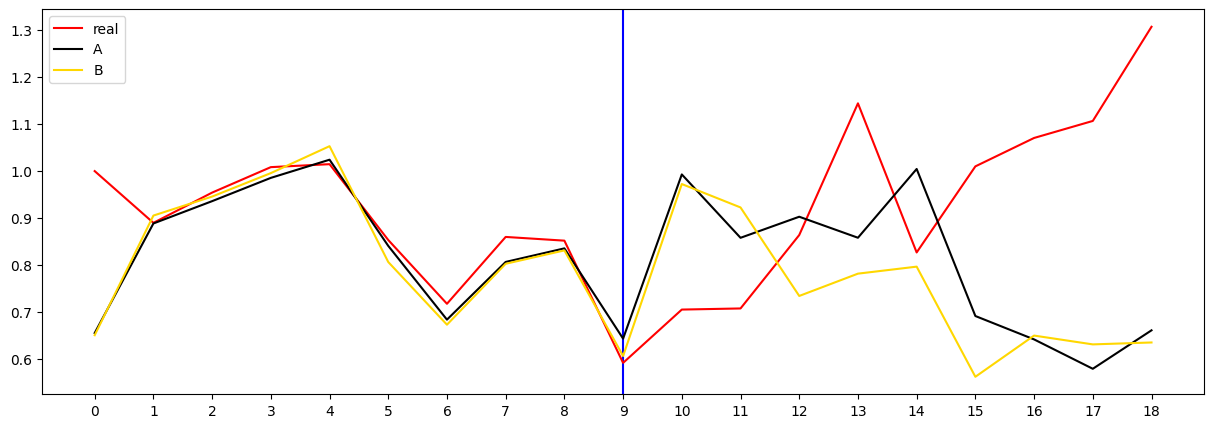

Which prediction is better? (A/B/skip): a
Saved preference.


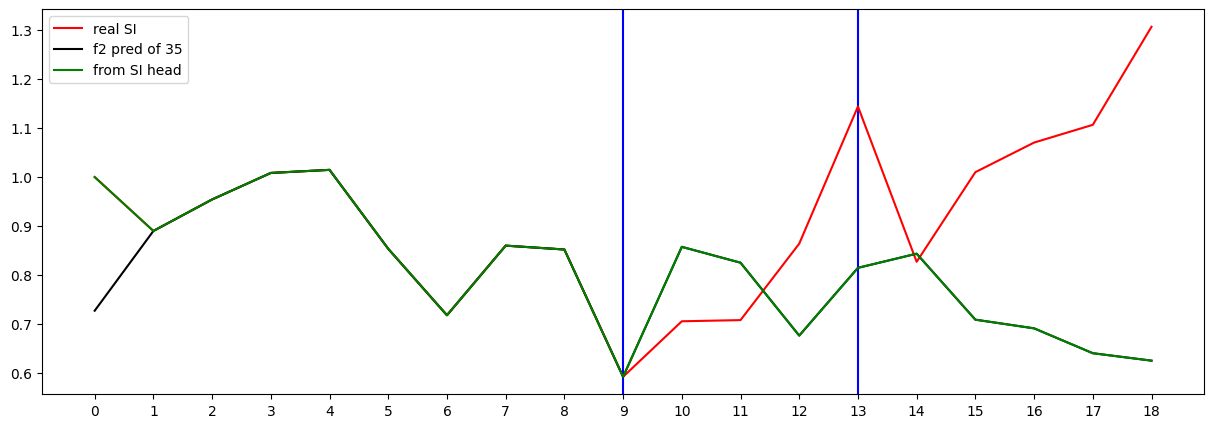

Testing R**2 - (all) - (no inputs):  0.9062731299570222
Testing R**2 - (f2) - SI full (no inputs):  -3.373949286473649
Testing R**2 - SI head only (no inputs):  -3.373949286473649
0 ...index R**2 (no inputs):  -0.3946934976634624
1 ...index R**2 (no inputs):  -1.834717016097076
2 ...index R**2 (no inputs):  -3.373949286473649
3 ...index R**2 (no inputs):  -1.6560688833041861
4 ...index R**2 (no inputs):  -2157.6080891260867
5 ...index R**2 (no inputs):  -1.5501123179955876
6 ...index R**2 (no inputs):  -83.16693491324912
7 ...index R**2 (no inputs):  -334799.9971453605
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3231956854598823
10 ...index R**2 (no inputs):  -1.2099041449770955
11 ...index R**2 (no inputs):  -43.502775112858075
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3751724462626105
16 ...index R**2 (no inputs):  -3.7649936591807993
17 ...index R**2 (no inputs):  

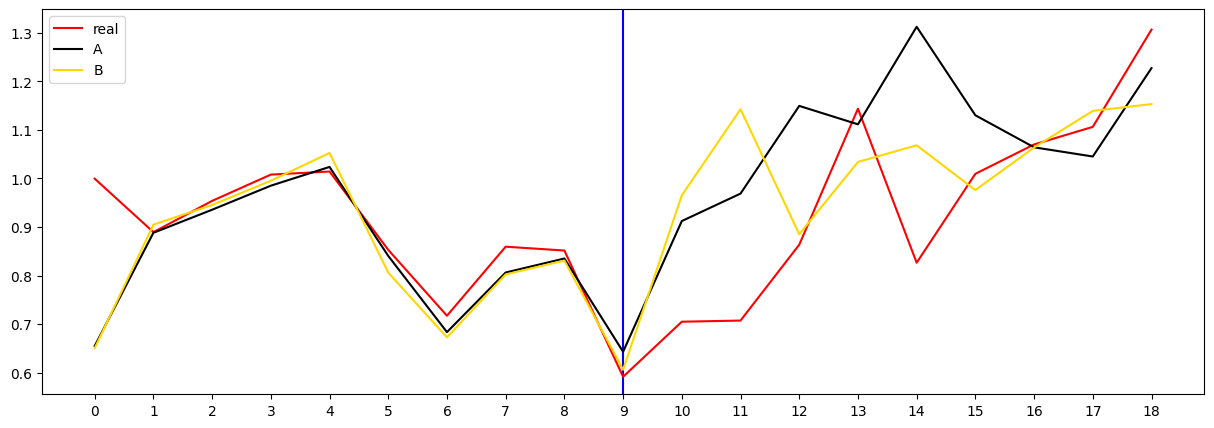

Which prediction is better? (A/B/skip): s


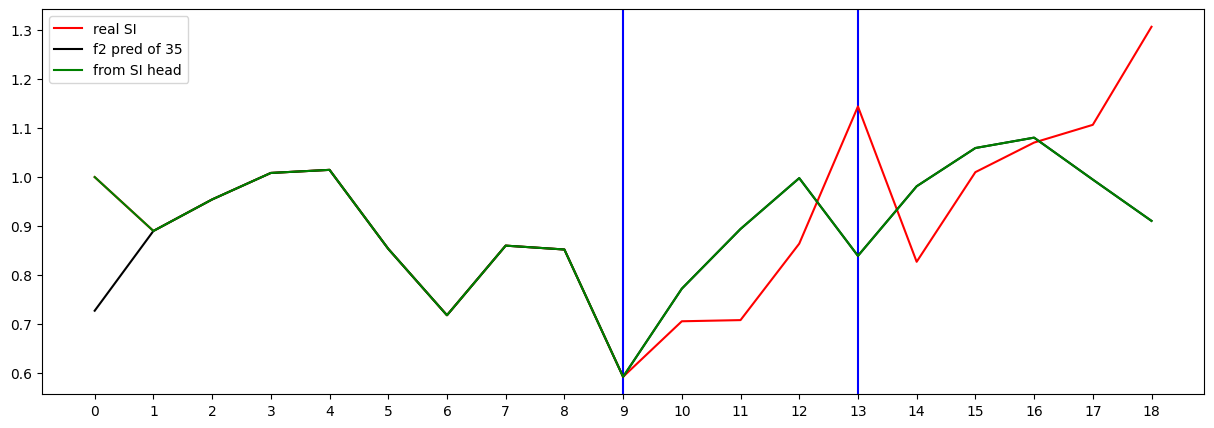

Testing R**2 - (all) - (no inputs):  0.9582262293506332
Testing R**2 - (f2) - SI full (no inputs):  0.4959764842602381
Testing R**2 - SI head only (no inputs):  0.4959764842602381
0 ...index R**2 (no inputs):  -1.5093316413559386
1 ...index R**2 (no inputs):  -1.0499737970174094
2 ...index R**2 (no inputs):  0.4959764842602381
3 ...index R**2 (no inputs):  -1.7346822148227252
4 ...index R**2 (no inputs):  -587.9255909841161
5 ...index R**2 (no inputs):  -0.5867313044786231
6 ...index R**2 (no inputs):  -630.8668445336881
7 ...index R**2 (no inputs):  -2132735.9437889094
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.07383378270140495
10 ...index R**2 (no inputs):  -3.5029605615905
11 ...index R**2 (no inputs):  -500.3672068491185
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.2890730561656243
16 ...index R**2 (no inputs):  -9.670312459597922
17 ...index R**2 (no inputs):  -267

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




## Run 2


In [32]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.297554
Loss_SI: 1.520540714263916 Loss_all: 1.2909226417541504
===


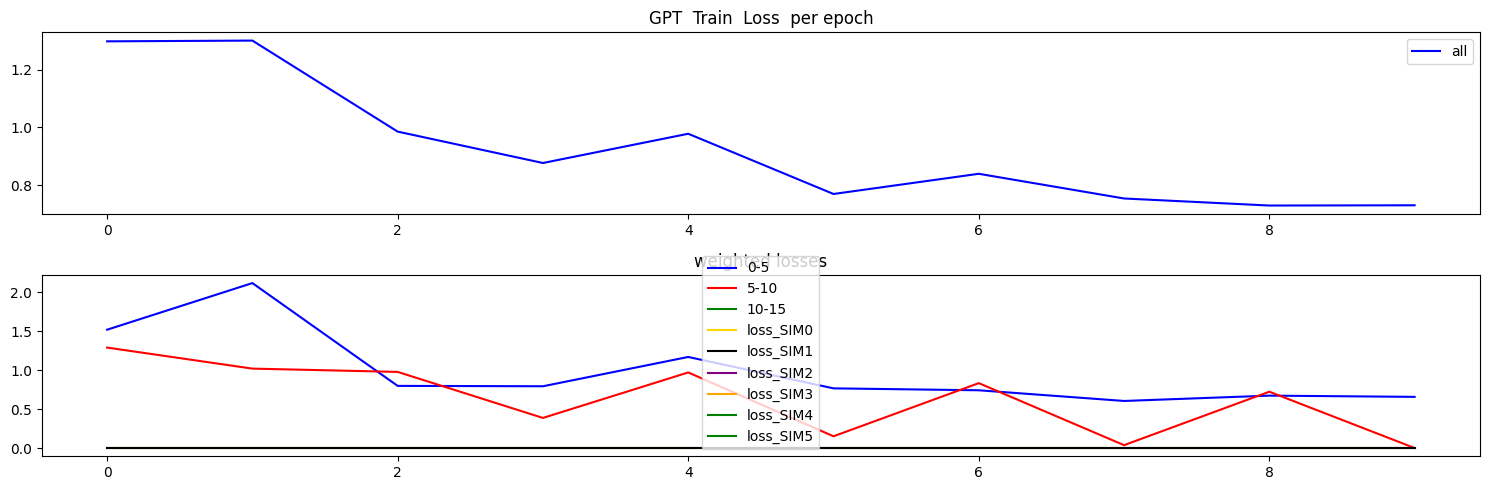

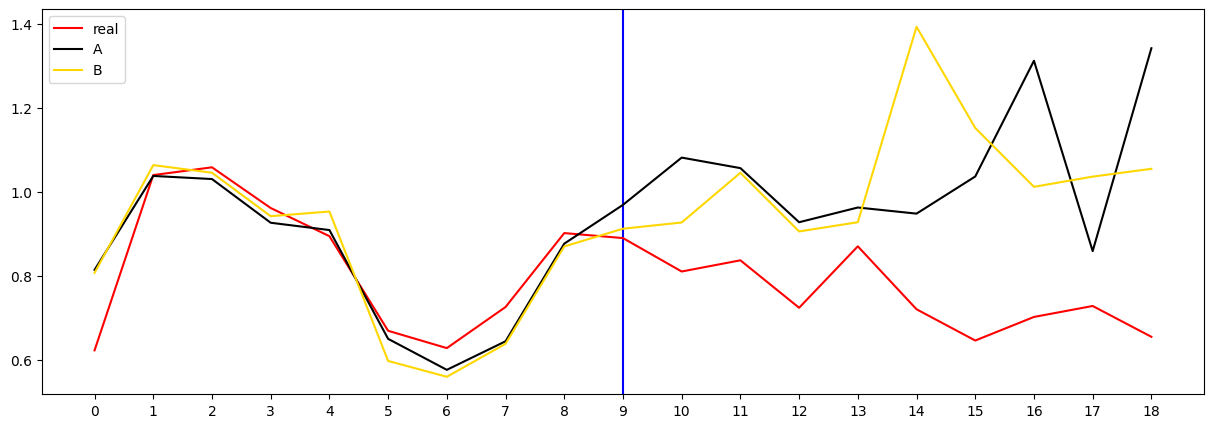

Which prediction is better? (A/B/skip): b
Saved preference.


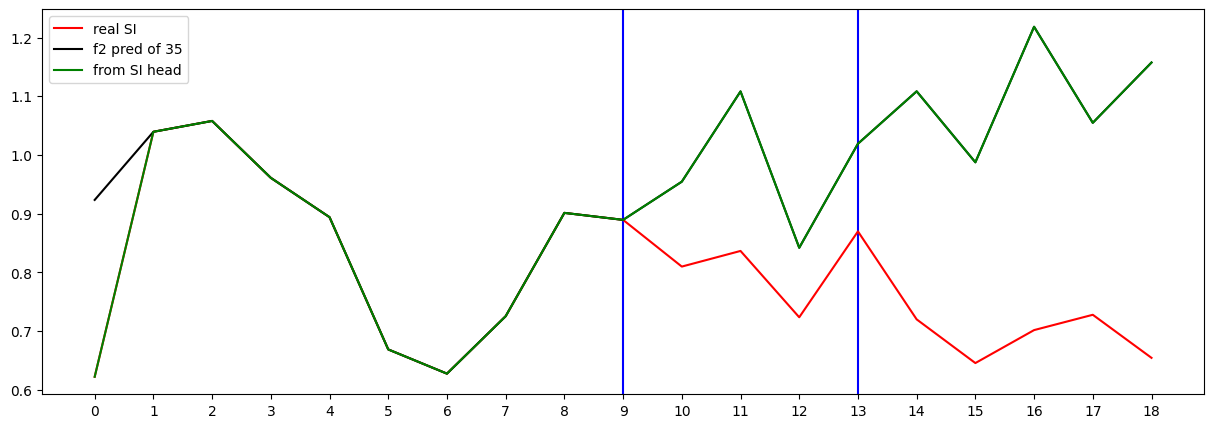

Testing R**2 - (all) - (no inputs):  0.9873878954237111
Testing R**2 - (f2) - SI full (no inputs):  -21.146284506515585
Testing R**2 - SI head only (no inputs):  -21.146284506515585
0 ...index R**2 (no inputs):  -2.04613727241987
1 ...index R**2 (no inputs):  -4.764939769865006
2 ...index R**2 (no inputs):  -21.146284506515585
3 ...index R**2 (no inputs):  -24.986059375945846
4 ...index R**2 (no inputs):  -111.1674134571506
5 ...index R**2 (no inputs):  -2.767630370039409
6 ...index R**2 (no inputs):  -24.963465059788952
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.38581479639792793
10 ...index R**2 (no inputs):  -0.22181325255329964
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6440310951320987
16 ...index R**2 (no inputs):  -3.561042901966384
17 ...index R**2 (no inputs):  -217.28582763671875
18 ...index

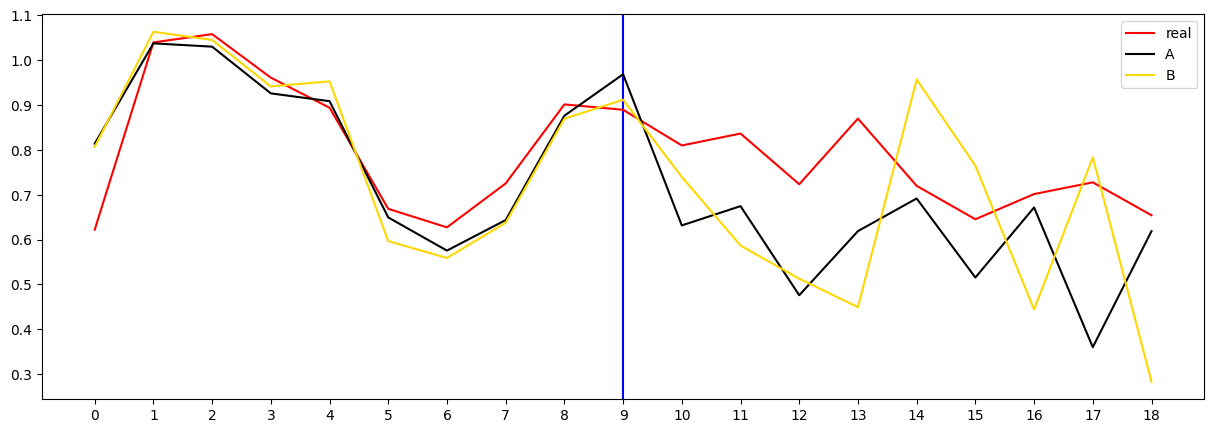

Which prediction is better? (A/B/skip): s


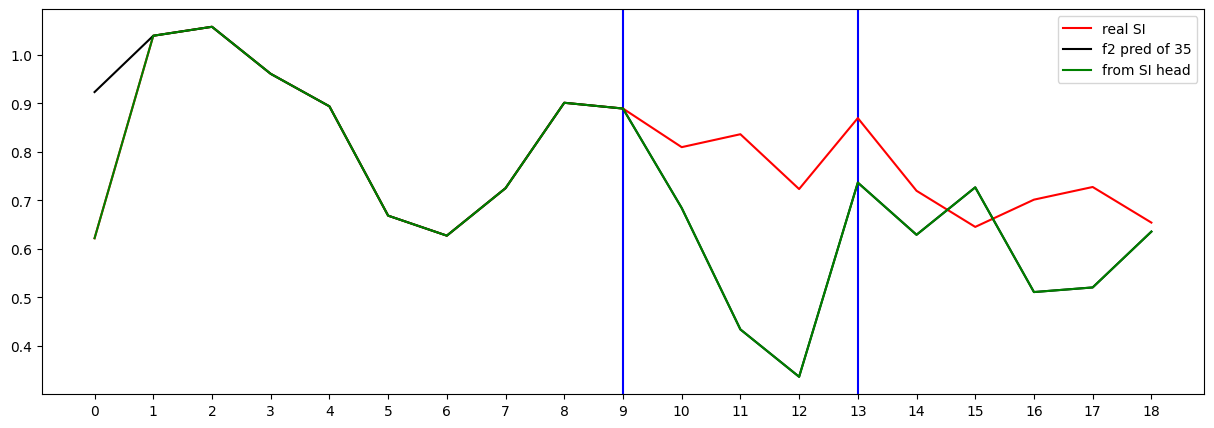

Testing R**2 - (all) - (no inputs):  0.9325082761214505
Testing R**2 - (f2) - SI full (no inputs):  -7.192298520203227
Testing R**2 - SI head only (no inputs):  -7.192298520203227
0 ...index R**2 (no inputs):  -0.9949325486753255
1 ...index R**2 (no inputs):  -7.899661152711316
2 ...index R**2 (no inputs):  -7.192298520203227
3 ...index R**2 (no inputs):  -126.67921032575549
4 ...index R**2 (no inputs):  -68.46984708296958
5 ...index R**2 (no inputs):  -19.25047314129348
6 ...index R**2 (no inputs):  -855.8915472784691
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.0020274014785935
10 ...index R**2 (no inputs):  -1.4557508376528792
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.705573435900625
16 ...index R**2 (no inputs):  -0.4958987552246137
17 ...index R**2 (no inputs):  -327.0065622965495
18 ...index R**

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.210024
Loss_SI: 1.3490818738937378 Loss_all: 1.2034621238708496
===


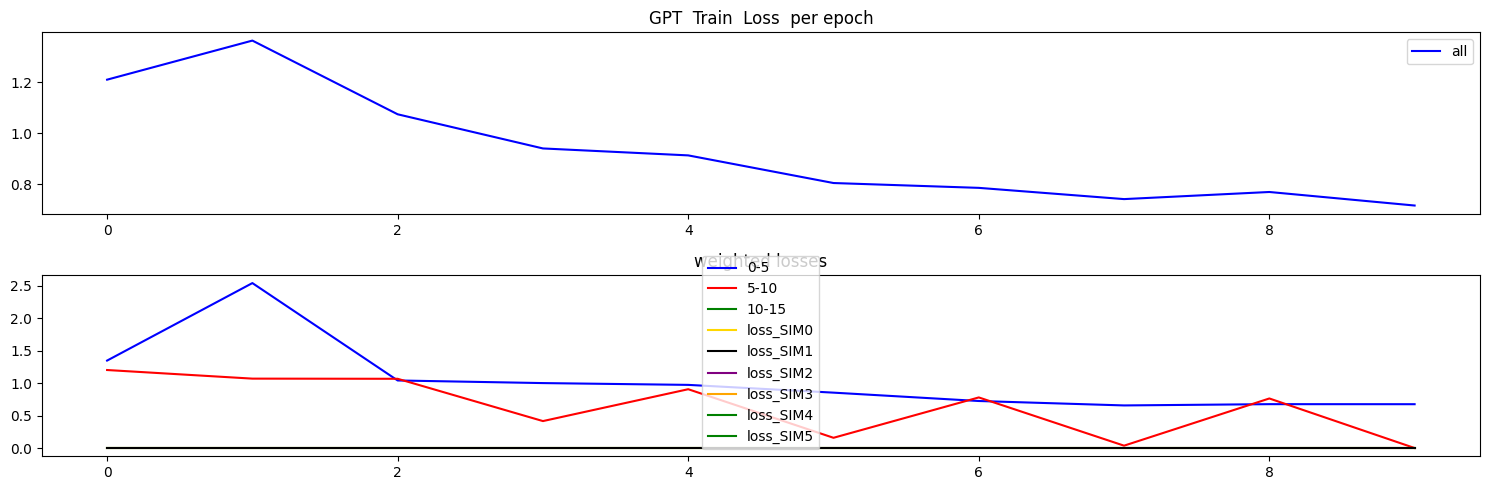

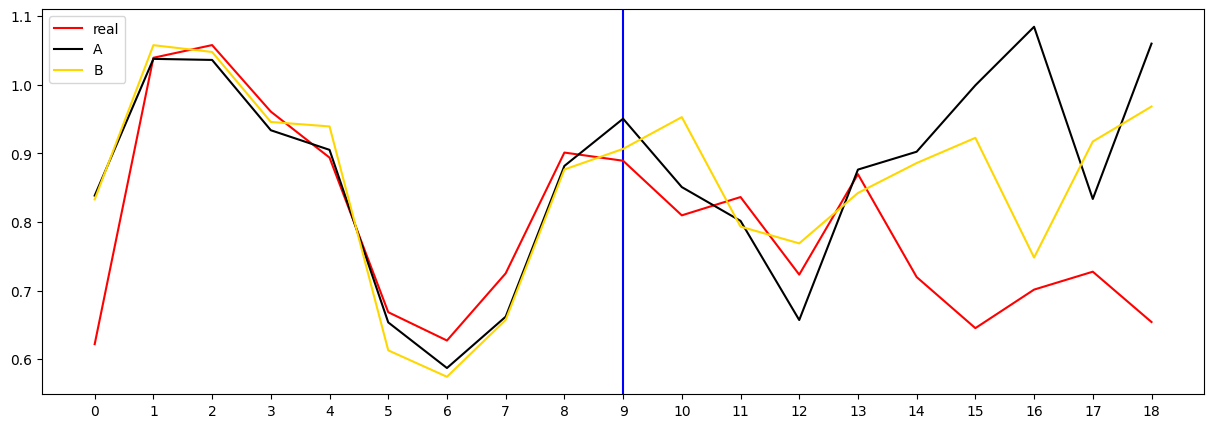

Which prediction is better? (A/B/skip): s


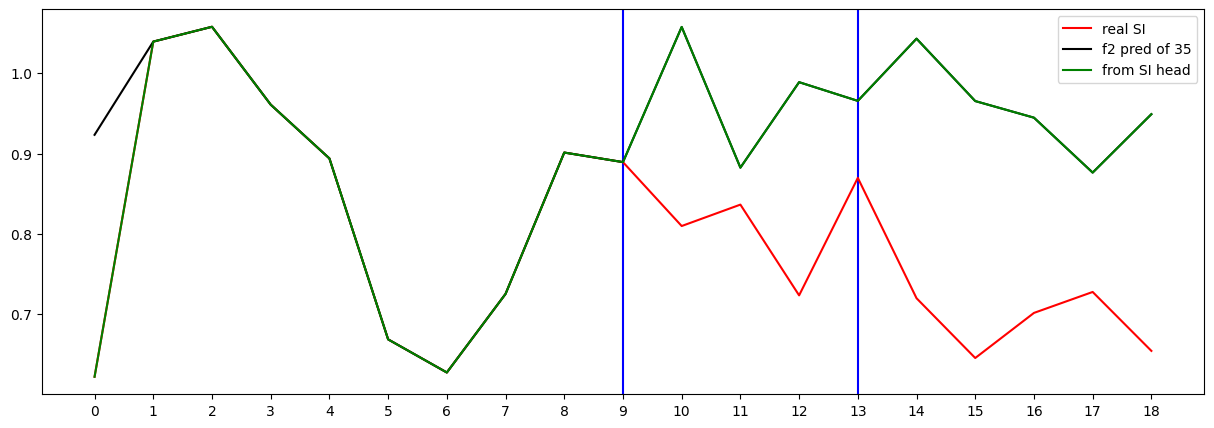

Testing R**2 - (all) - (no inputs):  0.992188495261144
Testing R**2 - (f2) - SI full (no inputs):  -9.390305237489645
Testing R**2 - SI head only (no inputs):  -9.390305237489645
0 ...index R**2 (no inputs):  -0.9633613298036809
1 ...index R**2 (no inputs):  0.00831243597462894
2 ...index R**2 (no inputs):  -9.390305237489645
3 ...index R**2 (no inputs):  -12.335074688758544
4 ...index R**2 (no inputs):  -55.197285792979464
5 ...index R**2 (no inputs):  -1.3081553222447657
6 ...index R**2 (no inputs):  -388.50038637995317
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.15155396206139737
10 ...index R**2 (no inputs):  -0.03978374341658664
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.388353719278357
16 ...index R**2 (no inputs):  -2.4963825822635575
17 ...index R**2 (no inputs):  -1200.2742228190104
18 ...inde

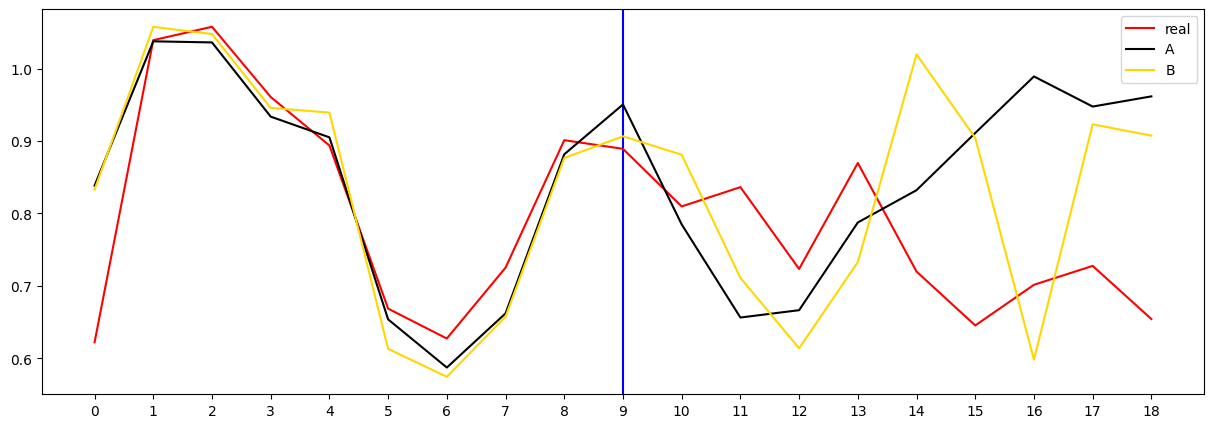

Which prediction is better? (A/B/skip): s


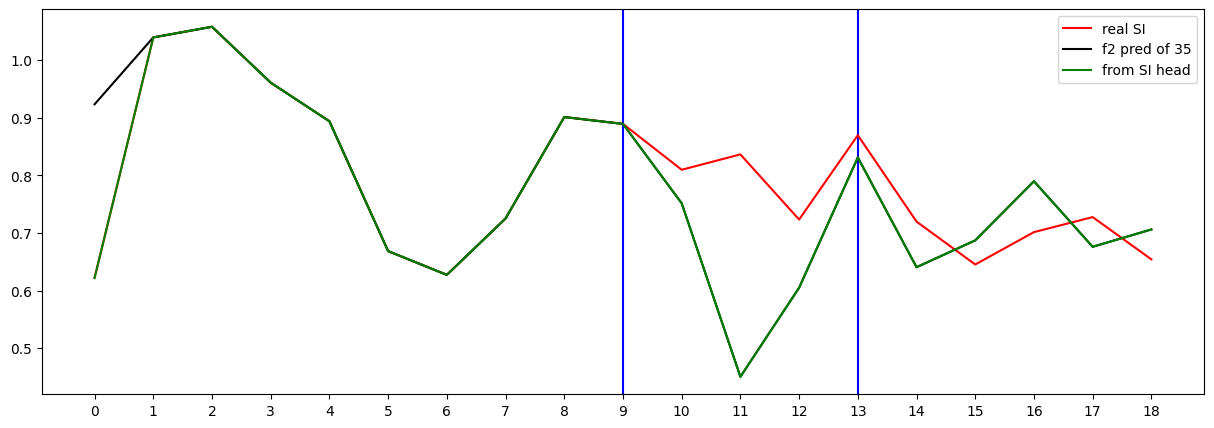

Testing R**2 - (all) - (no inputs):  0.9805462341814157
Testing R**2 - (f2) - SI full (no inputs):  -2.1479726062185063
Testing R**2 - SI head only (no inputs):  -2.1479726062185063
0 ...index R**2 (no inputs):  -6.622448862821211
1 ...index R**2 (no inputs):  -3.1316522101414925
2 ...index R**2 (no inputs):  -2.1479726062185063
3 ...index R**2 (no inputs):  -24.260019582300565
4 ...index R**2 (no inputs):  -210.19835277726338
5 ...index R**2 (no inputs):  -4.819288866516051
6 ...index R**2 (no inputs):  -2383.5377379993574
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5479064206328537
10 ...index R**2 (no inputs):  -2.341552367264852
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -15.734971461743626
16 ...index R**2 (no inputs):  -1.18547924383738
17 ...index R**2 (no inputs):  -413.8599227905273
18 ...index 

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
      
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.239758
Loss_SI: 1.3283777236938477 Loss_all: 1.2330809831619263
===


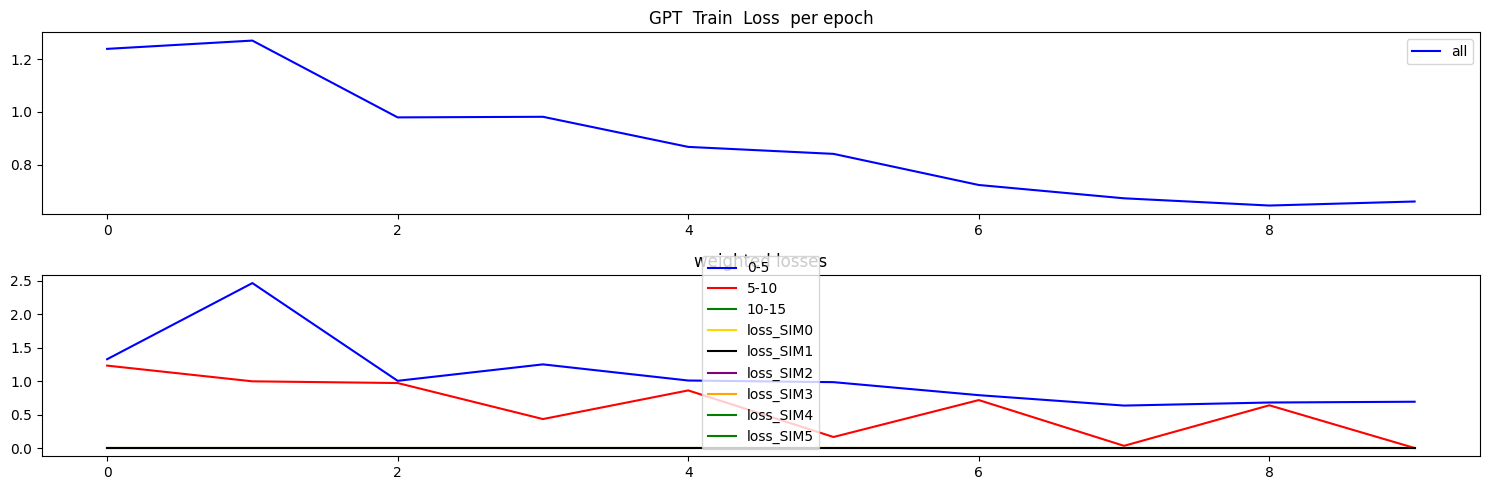

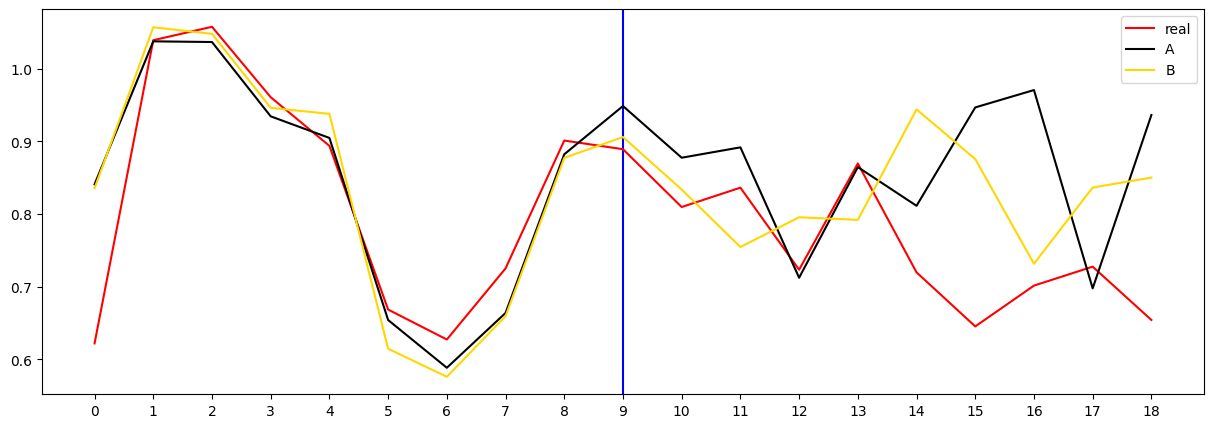

Which prediction is better? (A/B/skip): b
Saved preference.


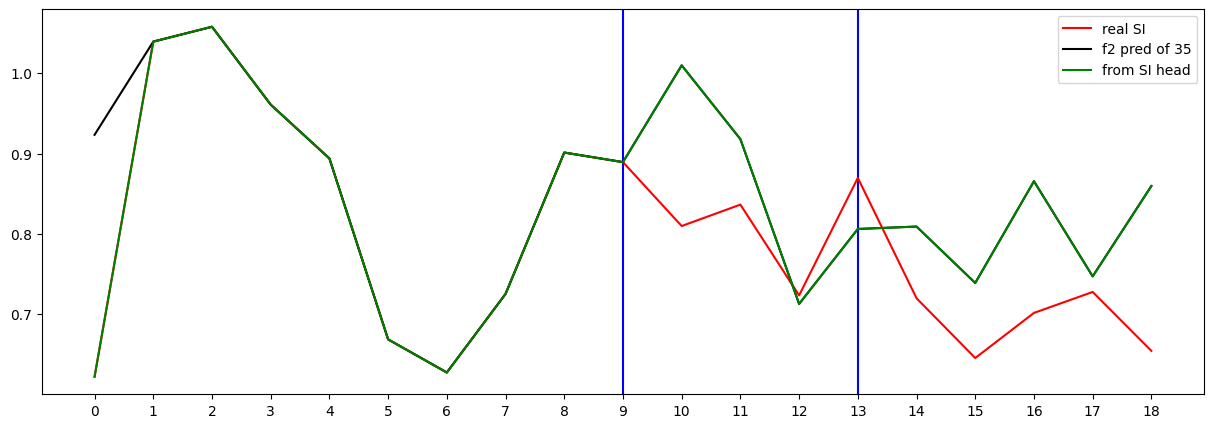

Testing R**2 - (all) - (no inputs):  0.9919372814584941
Testing R**2 - (f2) - SI full (no inputs):  -2.802826142517401
Testing R**2 - SI head only (no inputs):  -2.802826142517401
0 ...index R**2 (no inputs):  -0.714426885842002
1 ...index R**2 (no inputs):  -1.886660256840441
2 ...index R**2 (no inputs):  -2.802826142517401
3 ...index R**2 (no inputs):  -310.6421666508317
4 ...index R**2 (no inputs):  -854.3439313774768
5 ...index R**2 (no inputs):  -1.3719788657733907
6 ...index R**2 (no inputs):  -252.44088921269008
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14571061292065246
10 ...index R**2 (no inputs):  -0.5244056226476084
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7675505801215046
16 ...index R**2 (no inputs):  -5.202530631853356
17 ...index R**2 (no inputs):  -1261.4661722183228
18 ...index R

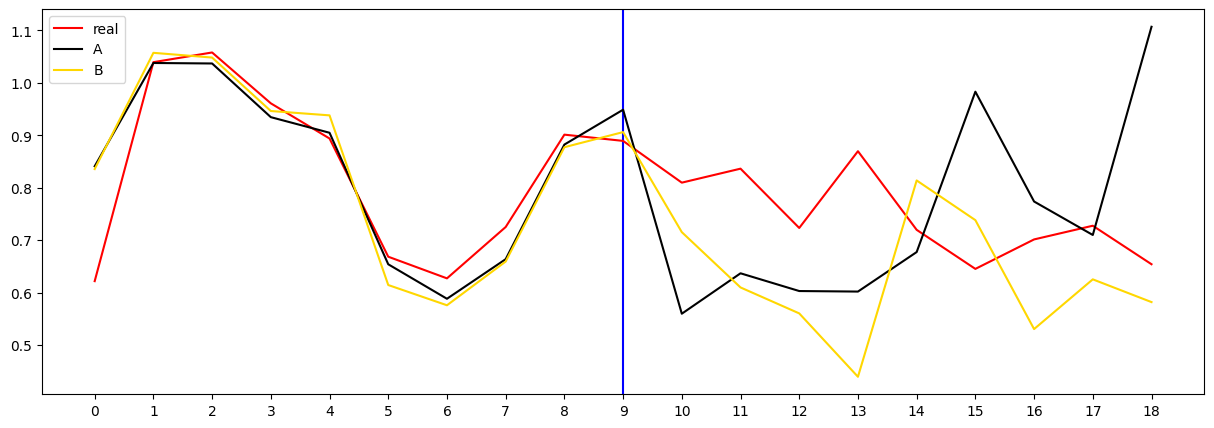

Which prediction is better? (A/B/skip): s


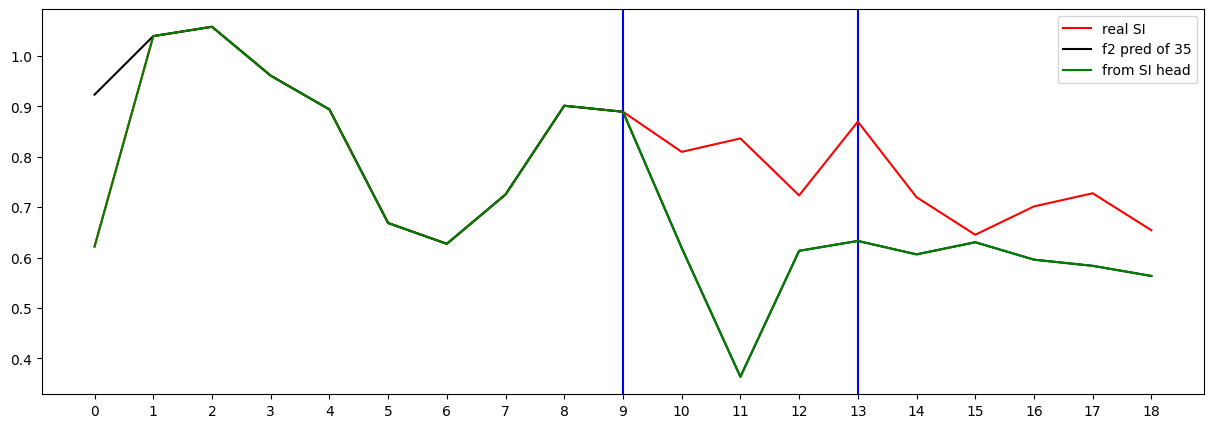

Testing R**2 - (all) - (no inputs):  0.970573793926398
Testing R**2 - (f2) - SI full (no inputs):  -4.05321952682672
Testing R**2 - SI head only (no inputs):  -4.05321952682672
0 ...index R**2 (no inputs):  0.110719440096124
1 ...index R**2 (no inputs):  -3.1637322573714437
2 ...index R**2 (no inputs):  -4.05321952682672
3 ...index R**2 (no inputs):  -635.1903594281957
4 ...index R**2 (no inputs):  -1523.618994234059
5 ...index R**2 (no inputs):  -7.780525595067676
6 ...index R**2 (no inputs):  -2527.3914566310777
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0466163847513896
10 ...index R**2 (no inputs):  -1.1395349187975308
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -18.038333857843092
16 ...index R**2 (no inputs):  -3.688083925051063
17 ...index R**2 (no inputs):  -1685.5728698730468
18 ...index R**2 (n

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



[0] Train Loss: 1.317470
Loss_SI: 1.609018325805664 Loss_all: 1.3108395338058472
===


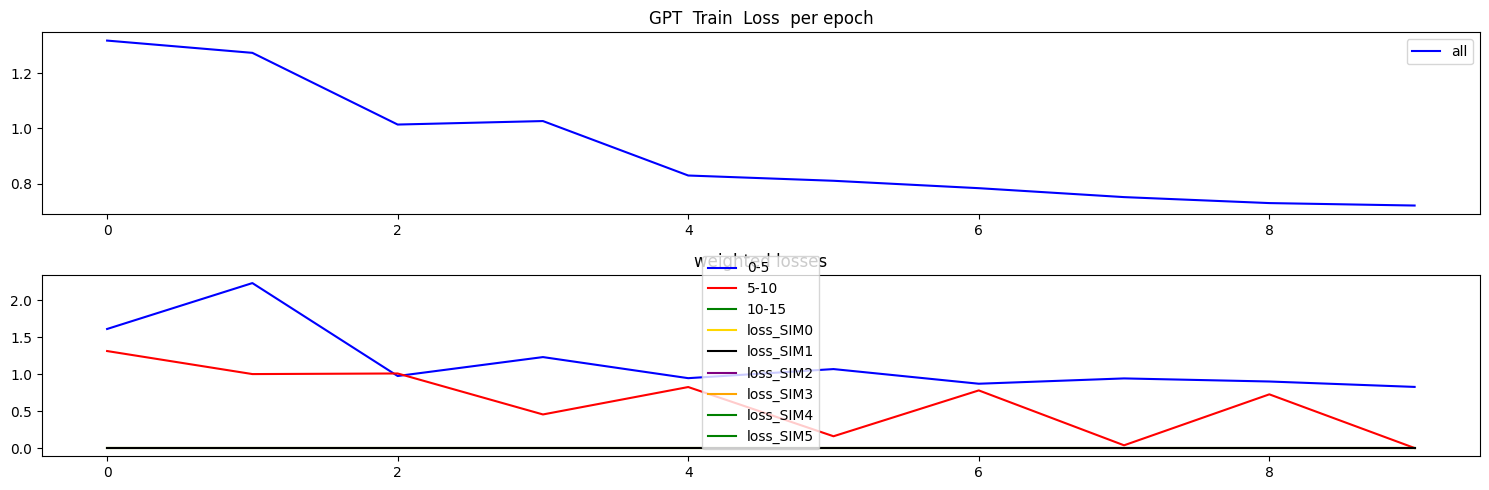

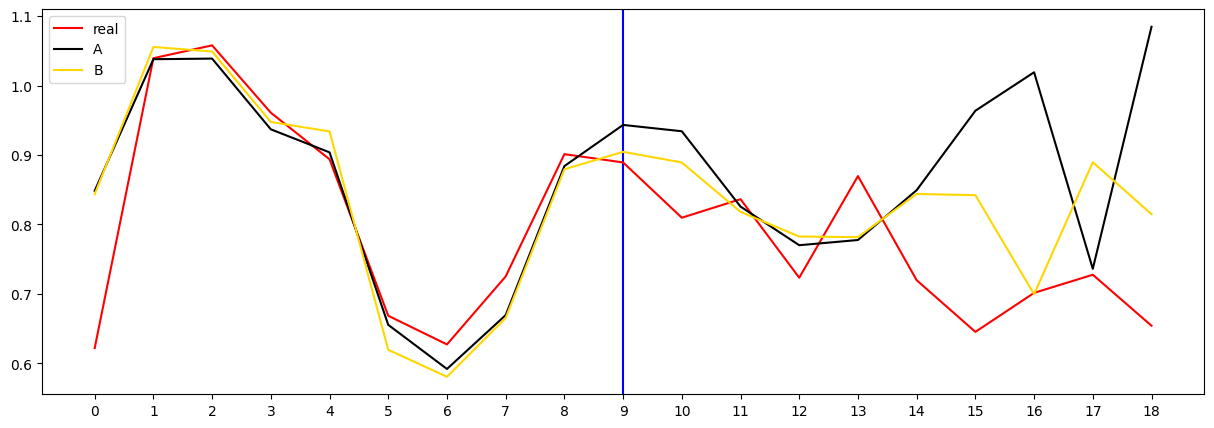

Which prediction is better? (A/B/skip): b
Saved preference.


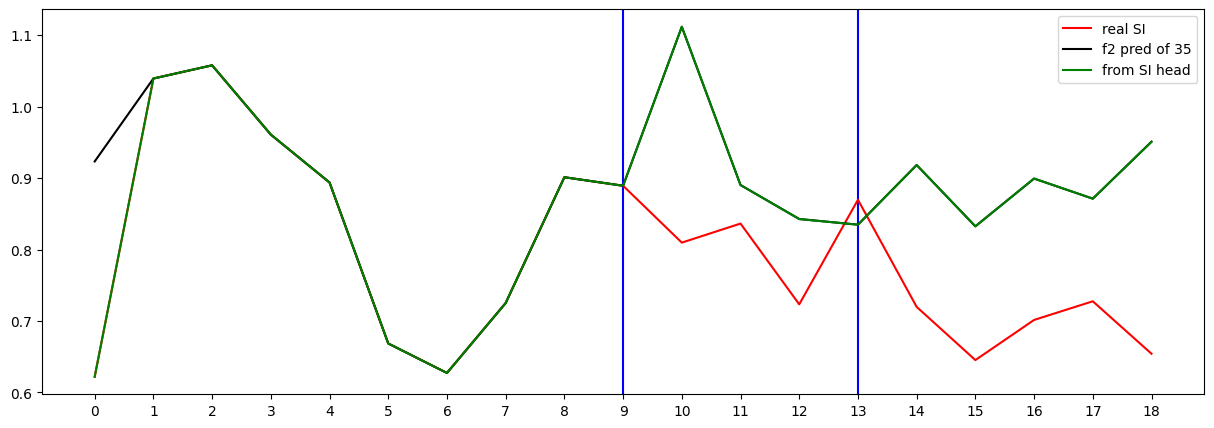

Testing R**2 - (all) - (no inputs):  0.9898490045031313
Testing R**2 - (f2) - SI full (no inputs):  -6.060431231968401
Testing R**2 - SI head only (no inputs):  -6.060431231968401
0 ...index R**2 (no inputs):  -1.0676244022603072
1 ...index R**2 (no inputs):  -2.1040377702982886
2 ...index R**2 (no inputs):  -6.060431231968401
3 ...index R**2 (no inputs):  -85.06576868374358
4 ...index R**2 (no inputs):  -318.81431664065326
5 ...index R**2 (no inputs):  -1.9528635754202326
6 ...index R**2 (no inputs):  -975.1296421470877
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.06610272531396277
10 ...index R**2 (no inputs):  -0.21974870043027894
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.347772354645949
16 ...index R**2 (no inputs):  -0.5186263060408982
17 ...index R**2 (no inputs):  -3796.755615234375
18 ...index

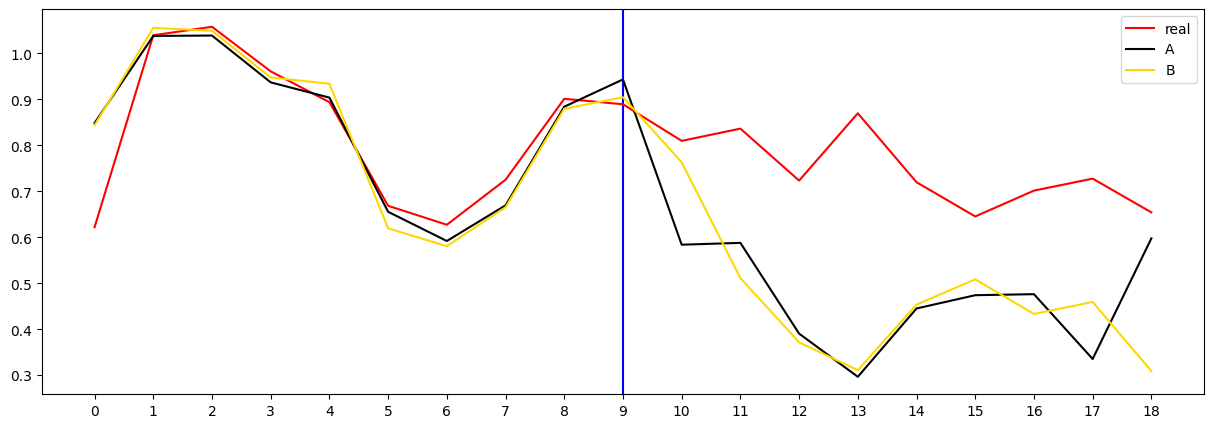

Which prediction is better? (A/B/skip): s


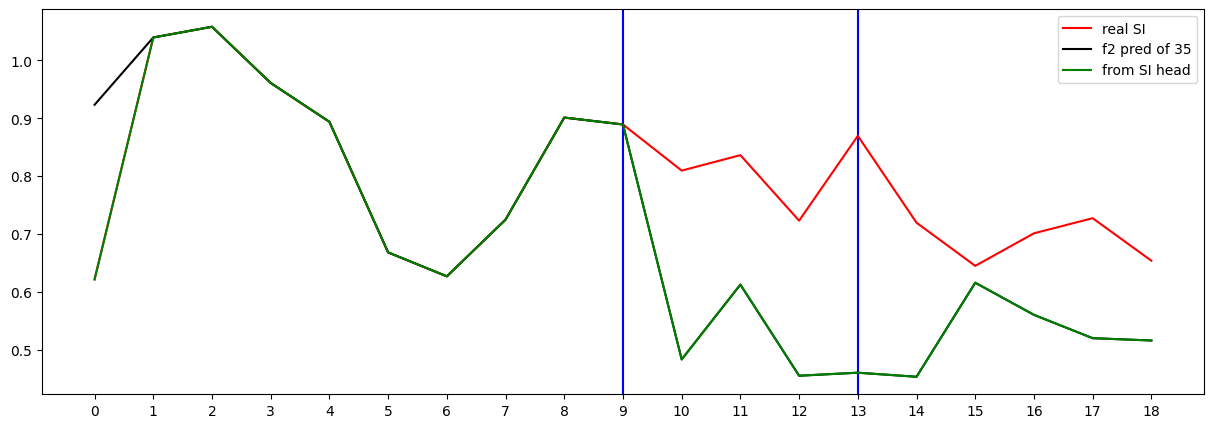

Testing R**2 - (all) - (no inputs):  0.9306356869235763
Testing R**2 - (f2) - SI full (no inputs):  -7.513971079270787
Testing R**2 - SI head only (no inputs):  -7.513971079270787
0 ...index R**2 (no inputs):  -2.566909521769428
1 ...index R**2 (no inputs):  -17.221966654020317
2 ...index R**2 (no inputs):  -7.513971079270787
3 ...index R**2 (no inputs):  -315.634232924382
4 ...index R**2 (no inputs):  -732.211358826486
5 ...index R**2 (no inputs):  -19.804807341843528
6 ...index R**2 (no inputs):  -6571.826801056443
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.6087189737338674
10 ...index R**2 (no inputs):  -2.7651567648577102
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.2314978015182207
16 ...index R**2 (no inputs):  -1.819332830500863
17 ...index R**2 (no inputs):  -654.1833069483439
18 ...index R**2 

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.311724
Loss_SI: 1.3375071287155151 Loss_all: 1.3051203489303589
===


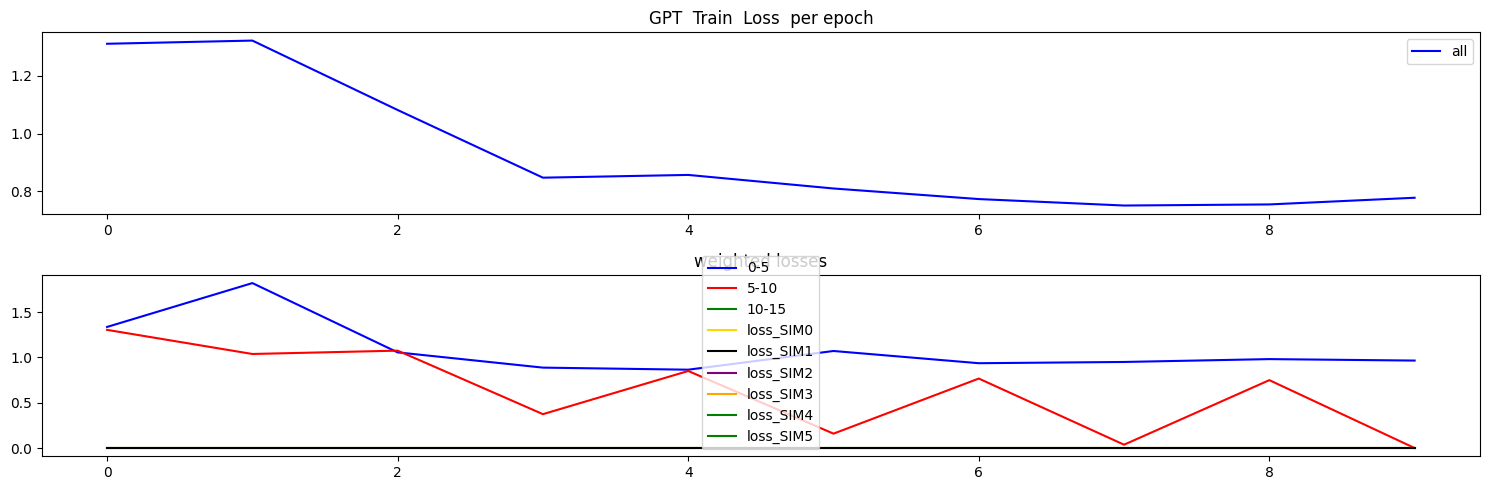

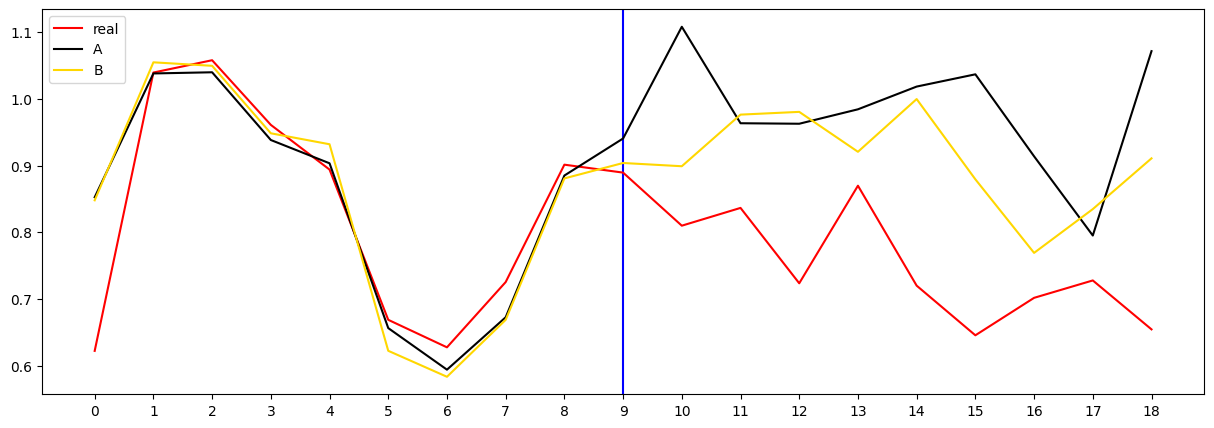

Which prediction is better? (A/B/skip): b
Saved preference.


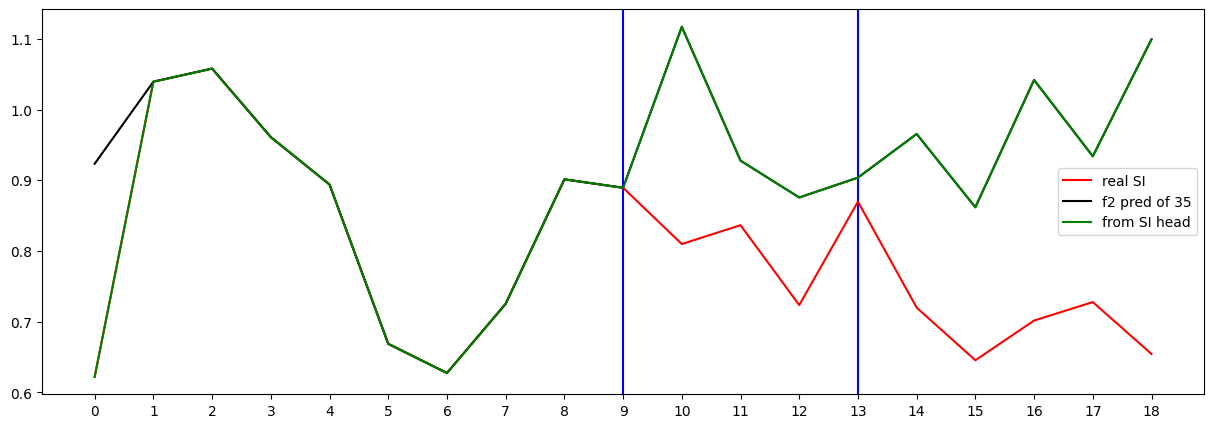

Testing R**2 - (all) - (no inputs):  0.9896964056891445
Testing R**2 - (f2) - SI full (no inputs):  -11.309925634445474
Testing R**2 - SI head only (no inputs):  -11.309925634445474
0 ...index R**2 (no inputs):  -0.7657848265016118
1 ...index R**2 (no inputs):  0.3082823102724058
2 ...index R**2 (no inputs):  -11.309925634445474
3 ...index R**2 (no inputs):  -39.63849166171265
4 ...index R**2 (no inputs):  -208.5432628545982
5 ...index R**2 (no inputs):  -1.89397384849467
6 ...index R**2 (no inputs):  -1321.7111270971775
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.02150795944456174
10 ...index R**2 (no inputs):  -0.15246954591142226
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.329782884506184
16 ...index R**2 (no inputs):  -3.0410912239615424
17 ...index R**2 (no inputs):  -8441.771809895834
18 ...index

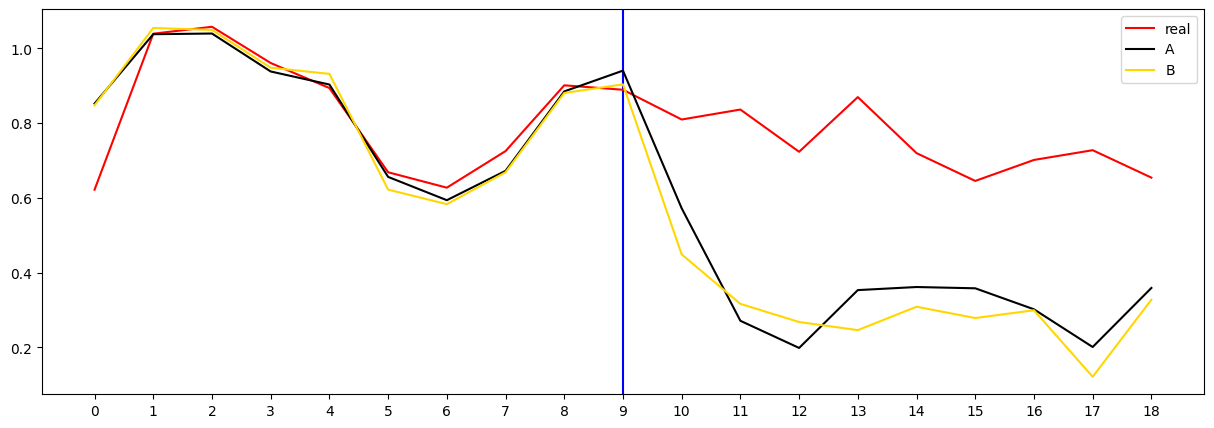

Which prediction is better? (A/B/skip): s


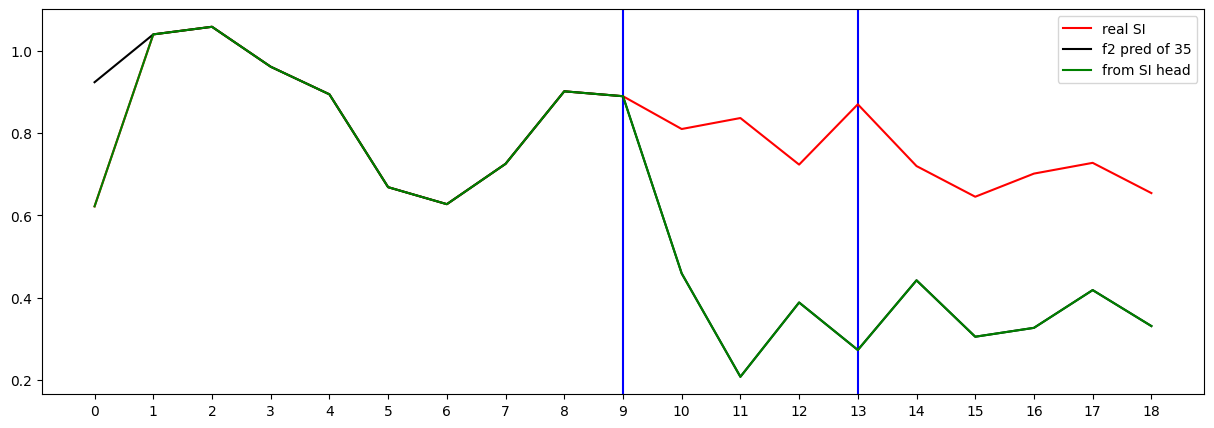

Testing R**2 - (all) - (no inputs):  0.9520820138661303
Testing R**2 - (f2) - SI full (no inputs):  -22.93588027981659
Testing R**2 - SI head only (no inputs):  -22.93588027981659
0 ...index R**2 (no inputs):  -0.7637970397685812
1 ...index R**2 (no inputs):  -37.23302667337143
2 ...index R**2 (no inputs):  -22.93588027981659
3 ...index R**2 (no inputs):  -572.966565640241
4 ...index R**2 (no inputs):  -220.25399526467552
5 ...index R**2 (no inputs):  -13.349728028530459
6 ...index R**2 (no inputs):  -7723.996648288712
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.215278451235549
10 ...index R**2 (no inputs):  -2.124088843199205
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7680261533551362
16 ...index R**2 (no inputs):  -1.592932127870717
17 ...index R**2 (no inputs):  -638.5435157775879
18 ...index R**2 

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




## Run 3


In [38]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.249644
Loss_SI: 1.4329890012741089 Loss_all: 1.2429203987121582
===


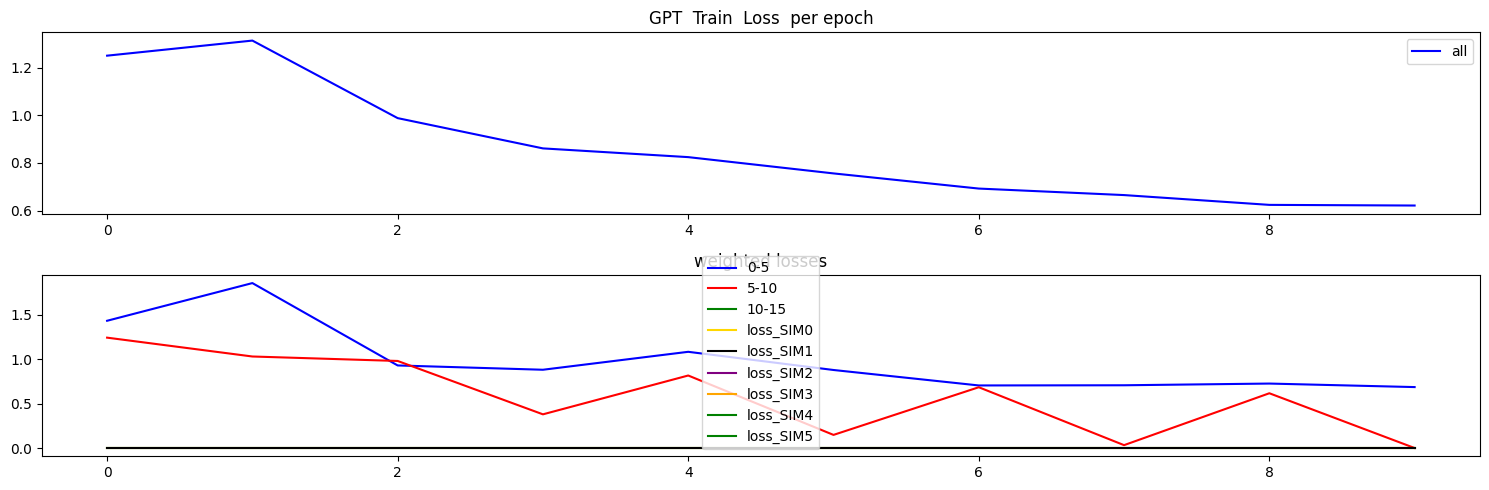

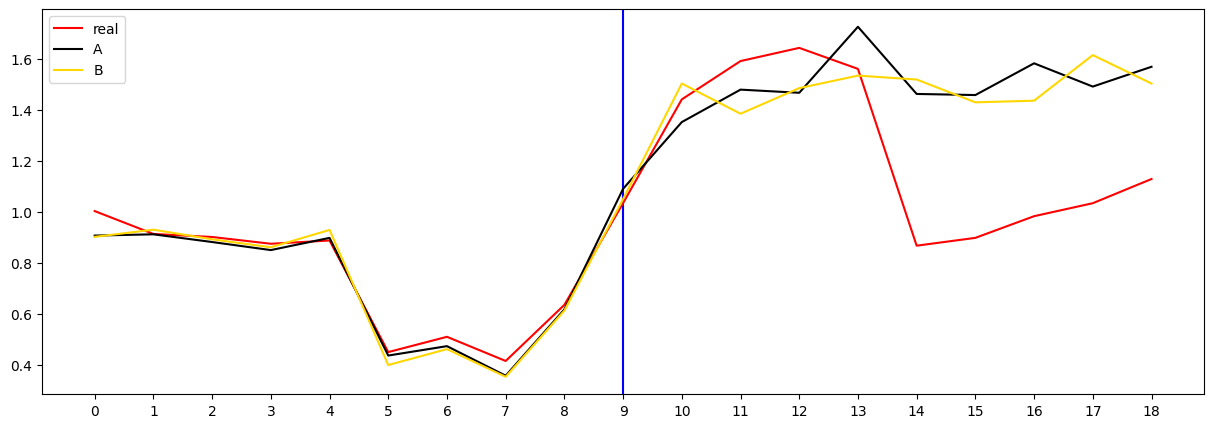

Which prediction is better? (A/B/skip): s


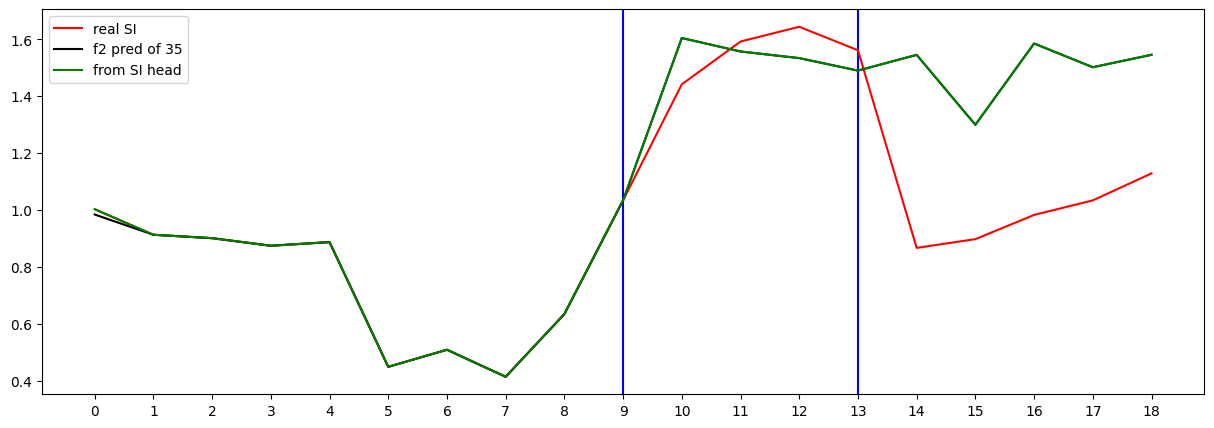

Testing R**2 - (all) - (no inputs):  0.7046989054252293
Testing R**2 - (f2) - SI full (no inputs):  -1.0630822887495643
Testing R**2 - SI head only (no inputs):  -1.0630822887495643
0 ...index R**2 (no inputs):  -0.39502268066784607
1 ...index R**2 (no inputs):  -1.2342458678942063
2 ...index R**2 (no inputs):  -1.0630822887495643
3 ...index R**2 (no inputs):  -0.7724229518259187
4 ...index R**2 (no inputs):  -0.798331170300715
5 ...index R**2 (no inputs):  -0.37378391793113974
6 ...index R**2 (no inputs):  -4172.720498162977
7 ...index R**2 (no inputs):  -0.4390855210576168
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.2262993324277063
10 ...index R**2 (no inputs):  -0.5833929979119081
11 ...index R**2 (no inputs):  -24.574320763908652
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.618980280819239
16 ...index R**2 (no inputs):  -0.48093513232615837
17 ...index R**2 (no inpu

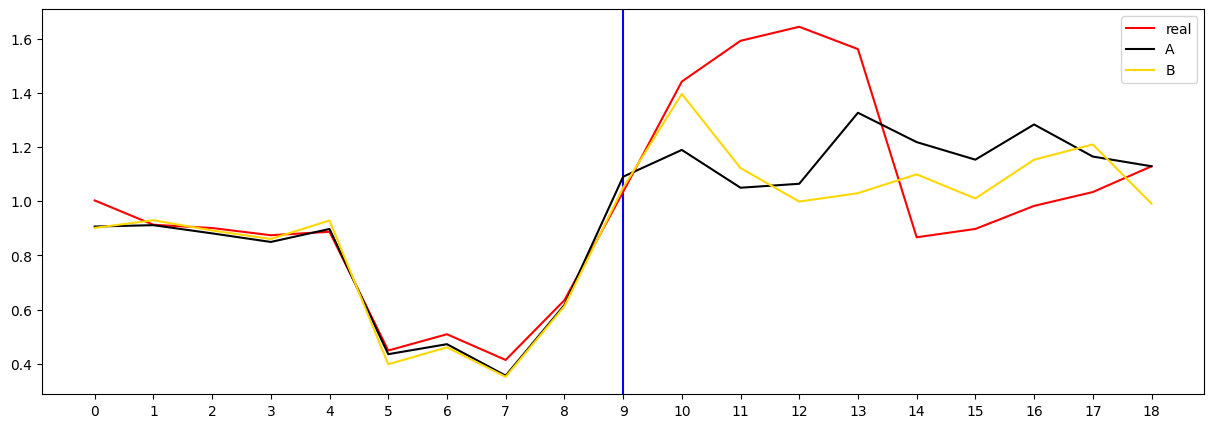

Which prediction is better? (A/B/skip): s


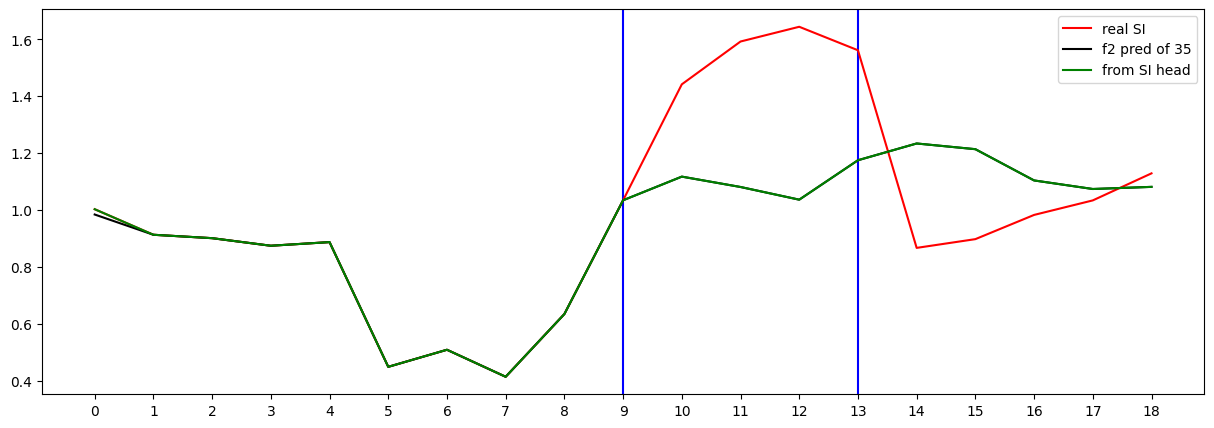

Testing R**2 - (all) - (no inputs):  0.6534463635348964
Testing R**2 - (f2) - SI full (no inputs):  -0.3639486359059829
Testing R**2 - SI head only (no inputs):  -0.3639486359059829
0 ...index R**2 (no inputs):  0.34213808297982407
1 ...index R**2 (no inputs):  -5.897539232736656
2 ...index R**2 (no inputs):  -0.3639486359059829
3 ...index R**2 (no inputs):  -0.08185099413094421
4 ...index R**2 (no inputs):  -0.3033460828908576
5 ...index R**2 (no inputs):  -0.6133498213399646
6 ...index R**2 (no inputs):  -322.33362669167303
7 ...index R**2 (no inputs):  -0.7756192185331929
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.082973125314524
10 ...index R**2 (no inputs):  -1.8713700222344918
11 ...index R**2 (no inputs):  -43.36744065392774
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.666698052985703
16 ...index R**2 (no inputs):  0.1506333063332712
17 ...index R**2 (no inputs):

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.255748
Loss_SI: 1.329724669456482 Loss_all: 1.249118685722351
===


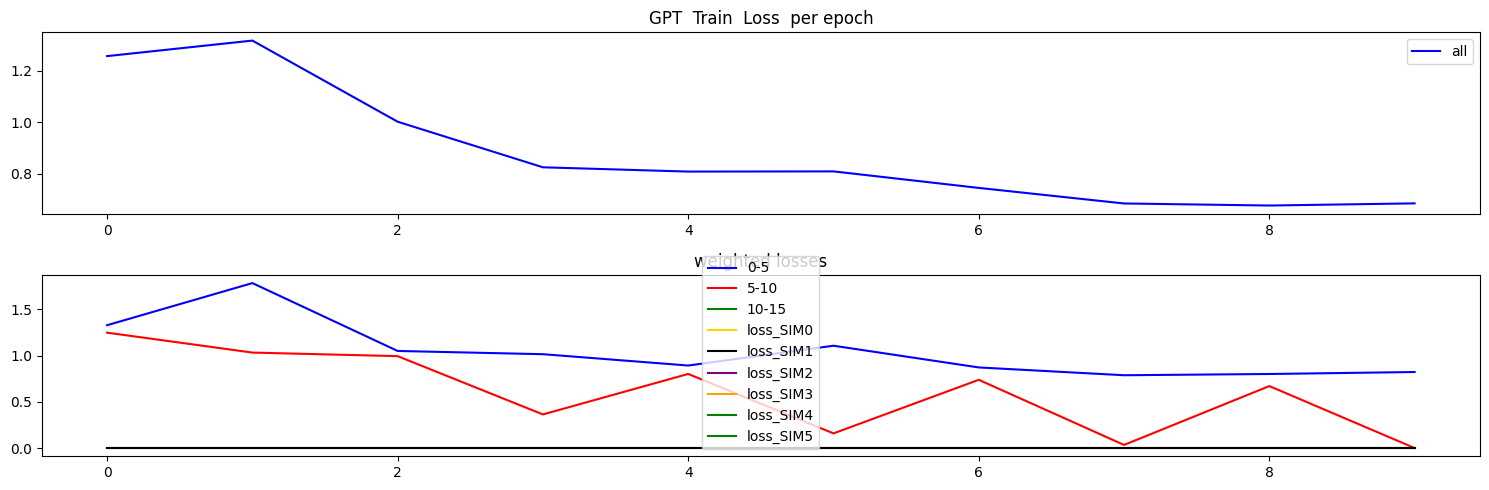

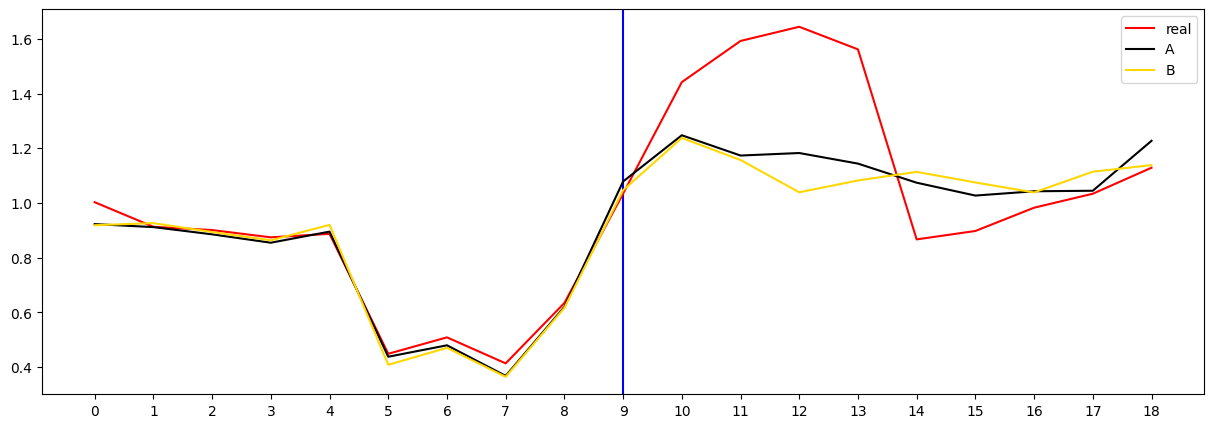

Which prediction is better? (A/B/skip): a
Saved preference.


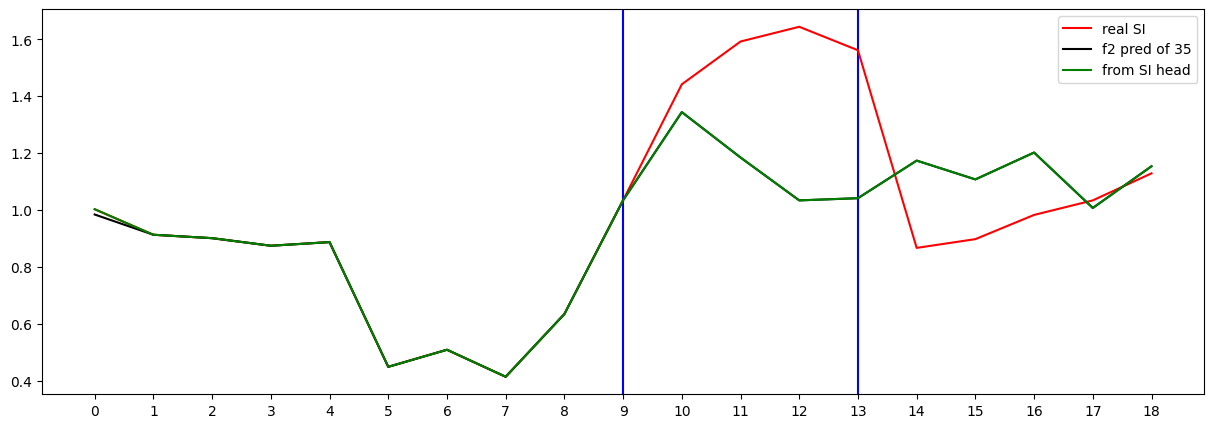

Testing R**2 - (all) - (no inputs):  0.6554896266241372
Testing R**2 - (f2) - SI full (no inputs):  0.07809599957458091
Testing R**2 - SI head only (no inputs):  0.07809599957458091
0 ...index R**2 (no inputs):  -0.4580364496567728
1 ...index R**2 (no inputs):  -1.4392272325058744
2 ...index R**2 (no inputs):  0.07809599957458091
3 ...index R**2 (no inputs):  0.1614621367559178
4 ...index R**2 (no inputs):  -0.8744322443787436
5 ...index R**2 (no inputs):  -0.6032301675193812
6 ...index R**2 (no inputs):  -567.9921678215011
7 ...index R**2 (no inputs):  -0.4872940032486186
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.957115422939324
10 ...index R**2 (no inputs):  -0.4135072221467071
11 ...index R**2 (no inputs):  -205.408042253203
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.5337887727692014
16 ...index R**2 (no inputs):  -0.4205607379219365
17 ...index R**2 (no inputs): 

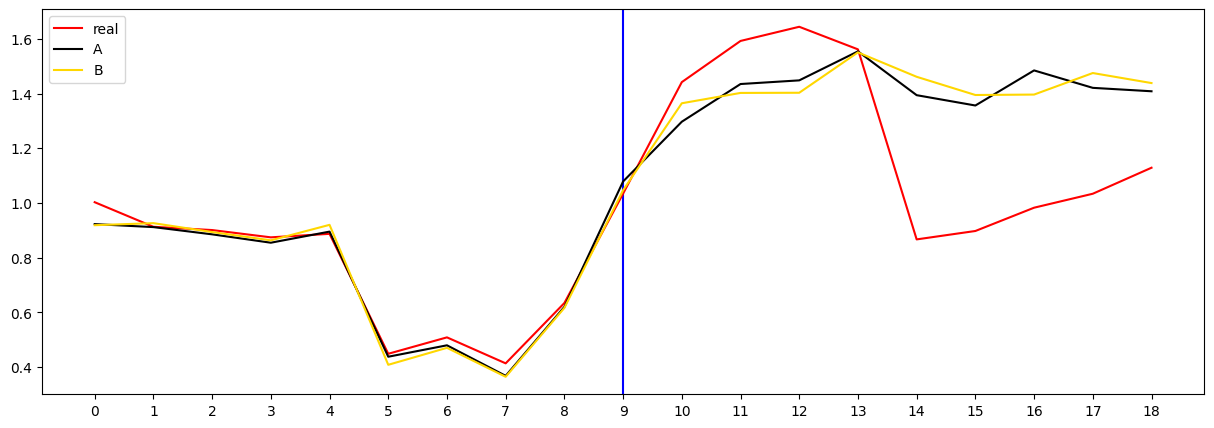

Which prediction is better? (A/B/skip): s


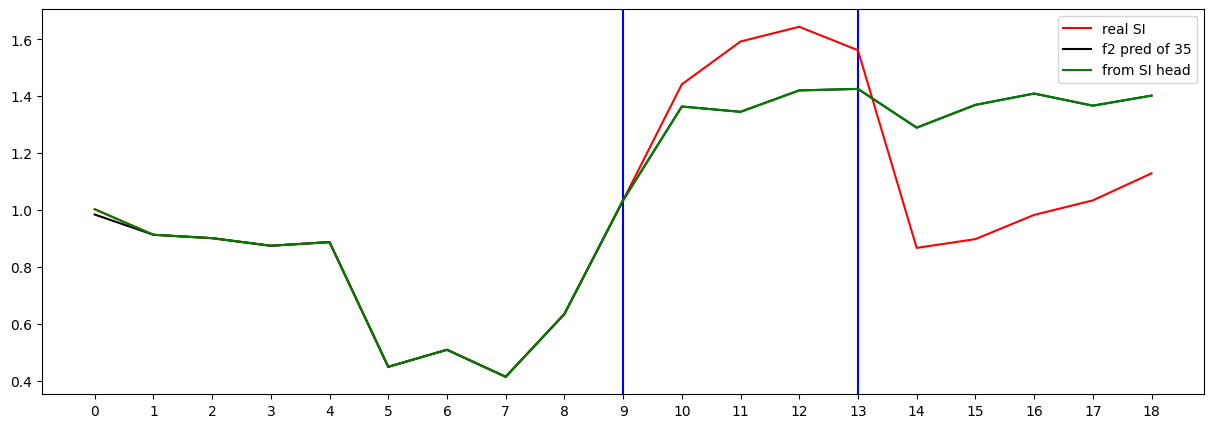

Testing R**2 - (all) - (no inputs):  0.7384296240245549
Testing R**2 - (f2) - SI full (no inputs):  -0.4138286684326573
Testing R**2 - SI head only (no inputs):  -0.4138286684326573
0 ...index R**2 (no inputs):  -0.19500673270536284
1 ...index R**2 (no inputs):  0.11760681229001124
2 ...index R**2 (no inputs):  -0.4138286684326573
3 ...index R**2 (no inputs):  -0.5481158035932137
4 ...index R**2 (no inputs):  -0.5647822709477799
5 ...index R**2 (no inputs):  -0.2131936534208776
6 ...index R**2 (no inputs):  -24158.679673834235
7 ...index R**2 (no inputs):  -0.15684669650045846
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.26044720339615113
10 ...index R**2 (no inputs):  -1.007080362414516
11 ...index R**2 (no inputs):  -2486.515216561043
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.822784737778489
16 ...index R**2 (no inputs):  -0.2129263246434281
17 ...index R**2 (no inpu

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




[0] Train Loss: 1.352091
Loss_SI: 1.4732283353805542 Loss_all: 1.3454793691635132
===


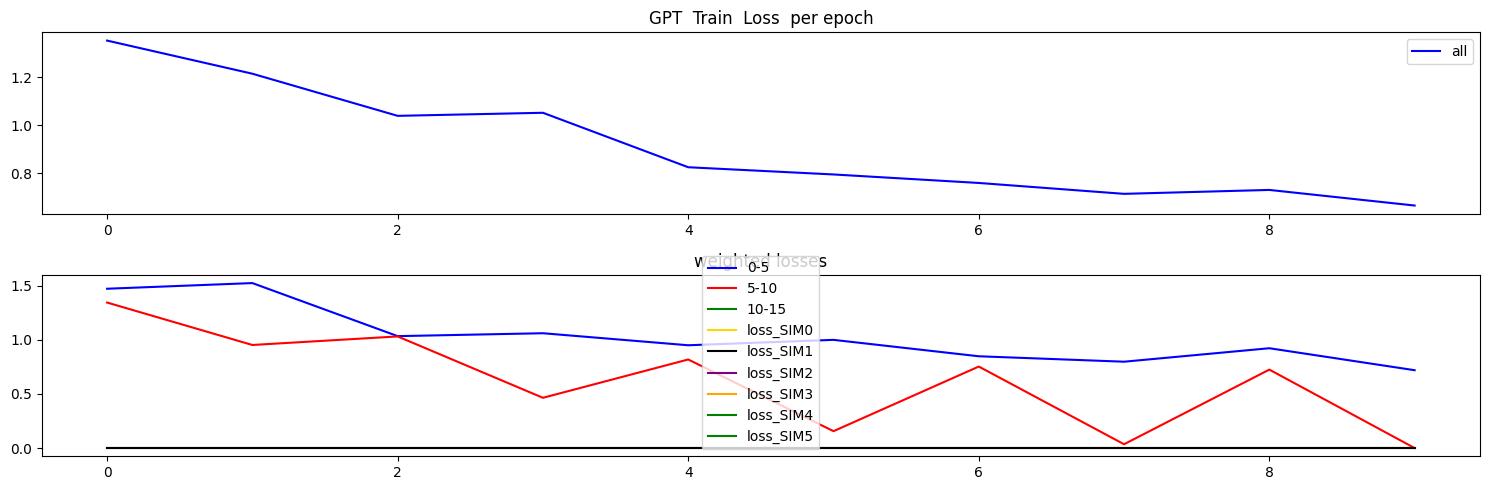

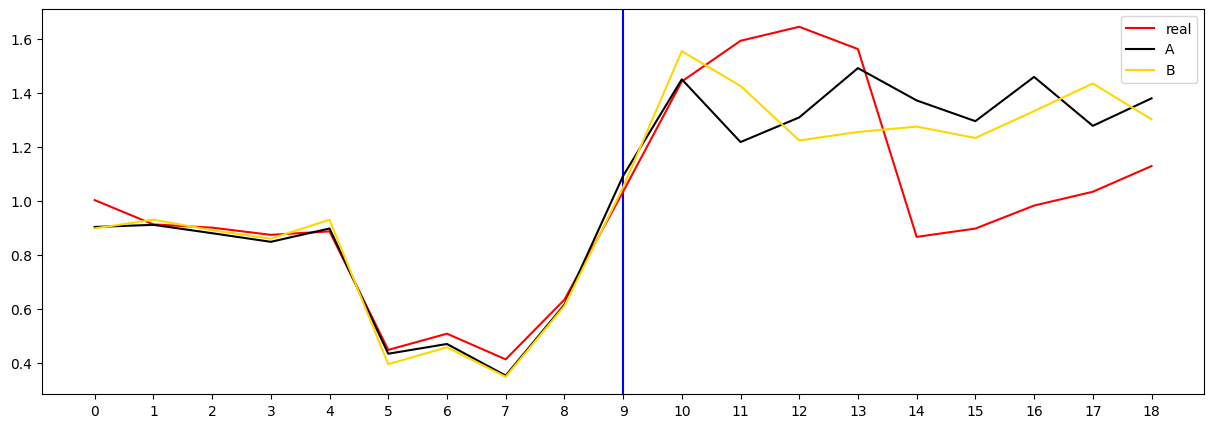

Which prediction is better? (A/B/skip): s


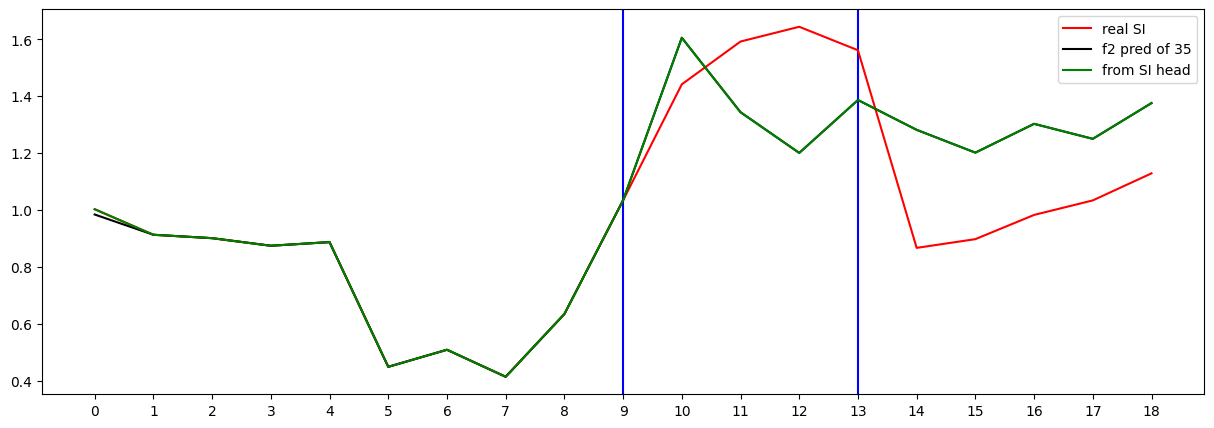

Testing R**2 - (all) - (no inputs):  0.728360951260006
Testing R**2 - (f2) - SI full (no inputs):  -0.13767625684531204
Testing R**2 - SI head only (no inputs):  -0.13767625684531204
0 ...index R**2 (no inputs):  -0.33177301203769116
1 ...index R**2 (no inputs):  -0.28625018248310385
2 ...index R**2 (no inputs):  -0.13767625684531204
3 ...index R**2 (no inputs):  -0.06223624243262771
4 ...index R**2 (no inputs):  -0.6732037497207126
5 ...index R**2 (no inputs):  -0.2573495852250365
6 ...index R**2 (no inputs):  -6402.536787904499
7 ...index R**2 (no inputs):  -0.08998448937533299
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.1236233160033042
10 ...index R**2 (no inputs):  -0.7364106870791636
11 ...index R**2 (no inputs):  -50.05675720290055
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5095256011951561
16 ...index R**2 (no inputs):  -0.31970707454551905
17 ...index R**2 (no

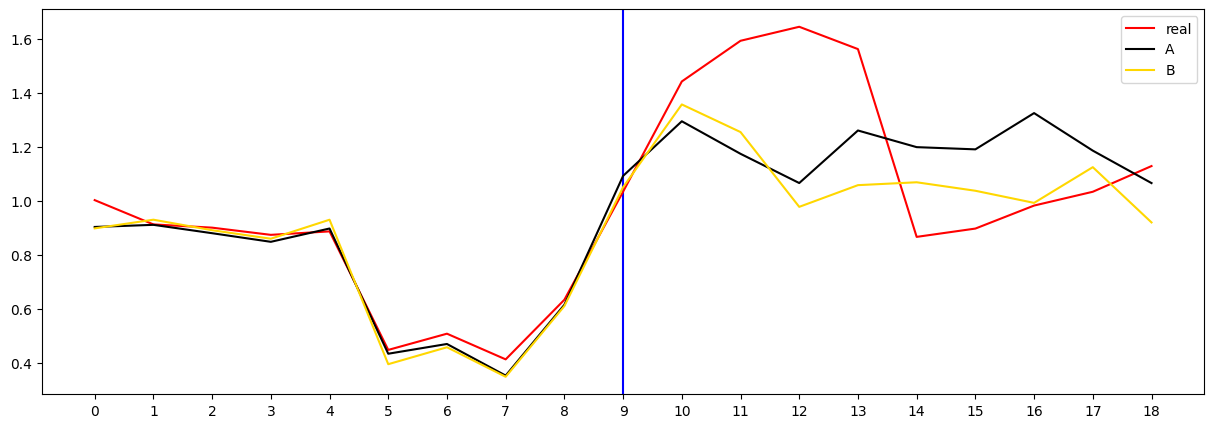

Which prediction is better? (A/B/skip): s


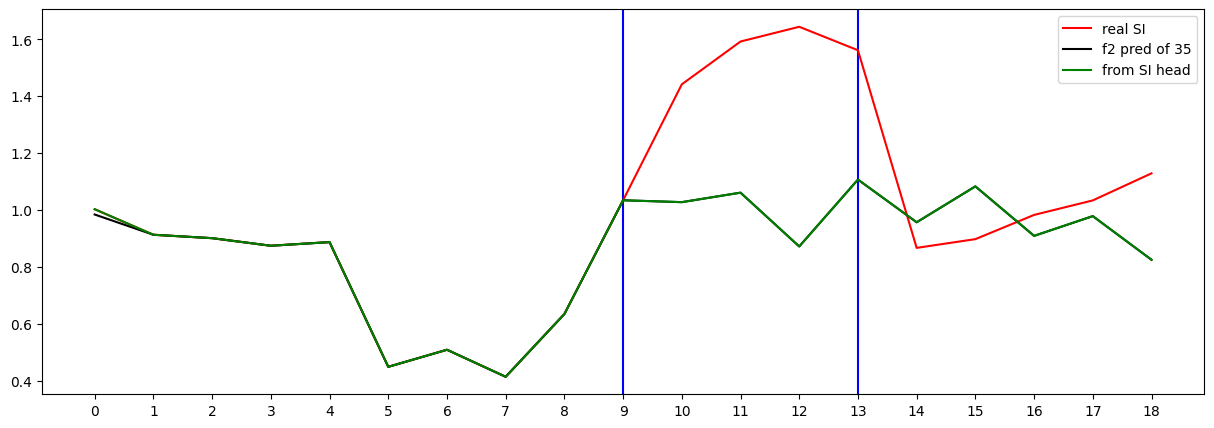

Testing R**2 - (all) - (no inputs):  0.5560535765236749
Testing R**2 - (f2) - SI full (no inputs):  -0.5900944448980456
Testing R**2 - SI head only (no inputs):  -0.5900944448980456
0 ...index R**2 (no inputs):  0.205116011735331
1 ...index R**2 (no inputs):  -2.1764590554184813
2 ...index R**2 (no inputs):  -0.5900944448980456
3 ...index R**2 (no inputs):  -0.07009154727085676
4 ...index R**2 (no inputs):  -0.40763166144258967
5 ...index R**2 (no inputs):  -1.0681170331995715
6 ...index R**2 (no inputs):  -1514.9173677663507
7 ...index R**2 (no inputs):  -0.4866937848227666
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2049727897004598
10 ...index R**2 (no inputs):  -2.507446411384783
11 ...index R**2 (no inputs):  -594.0461759409245
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7444211873726956
16 ...index R**2 (no inputs):  -0.11134418576676963
17 ...index R**2 (no input

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.254803
Loss_SI: 1.1851166486740112 Loss_all: 1.2481541633605957
===


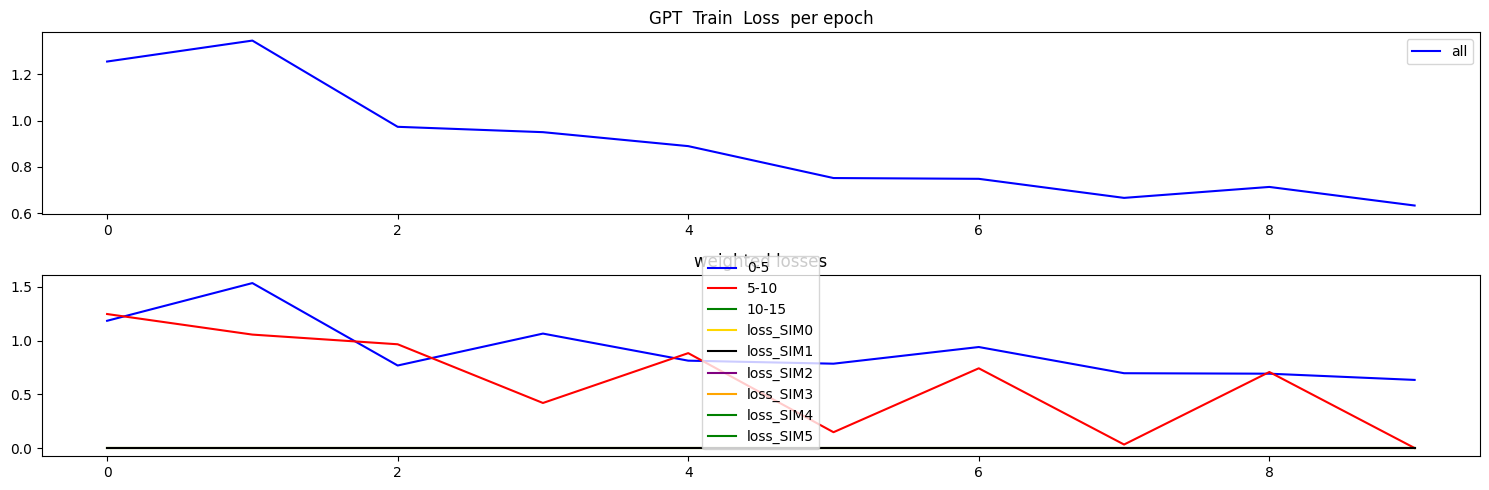

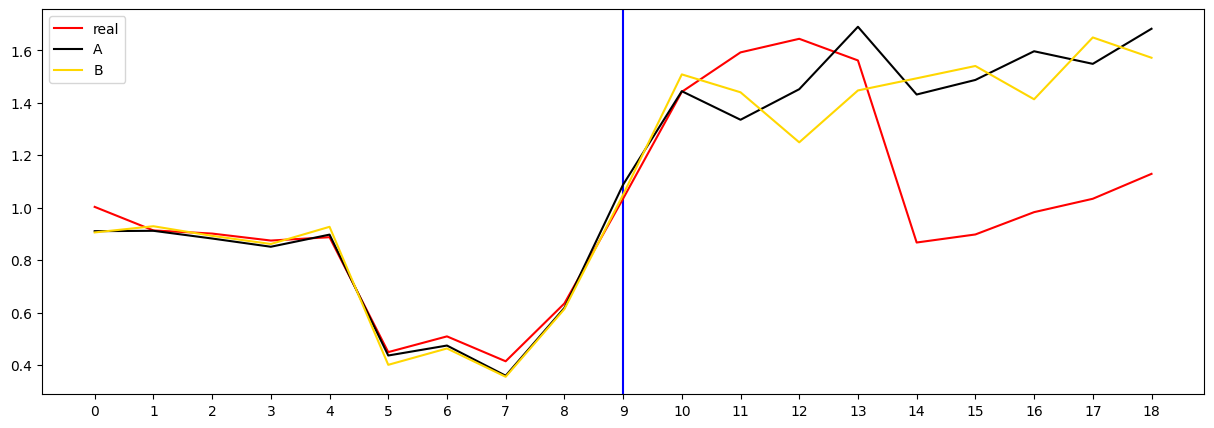

Which prediction is better? (A/B/skip): s


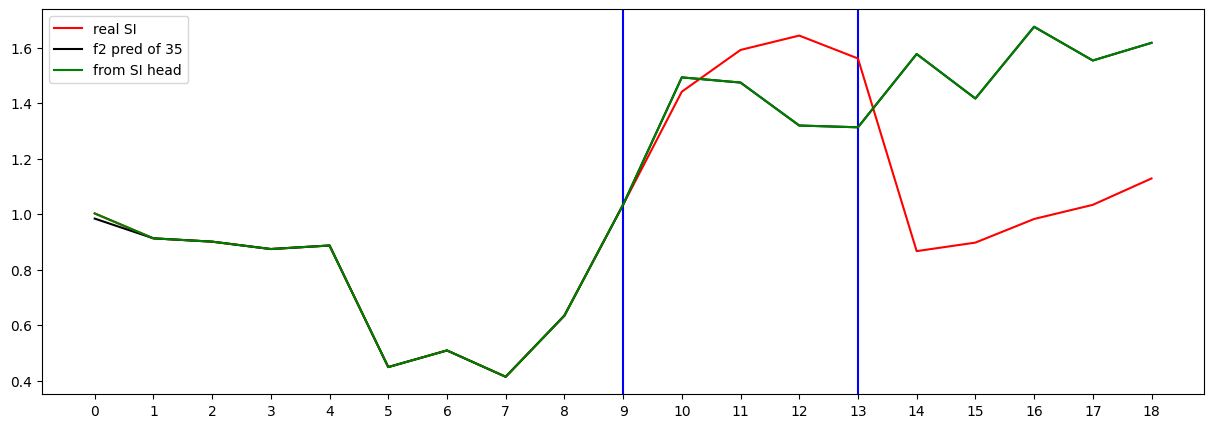

Testing R**2 - (all) - (no inputs):  0.7161490587624975
Testing R**2 - (f2) - SI full (no inputs):  -1.3923376644190442
Testing R**2 - SI head only (no inputs):  -1.3923376644190442
0 ...index R**2 (no inputs):  -0.33293768290052683
1 ...index R**2 (no inputs):  -0.19863751327098966
2 ...index R**2 (no inputs):  -1.3923376644190442
3 ...index R**2 (no inputs):  -1.715969957925188
4 ...index R**2 (no inputs):  -0.31866201342598766
5 ...index R**2 (no inputs):  -0.30068238834748806
6 ...index R**2 (no inputs):  -10904.831034190962
7 ...index R**2 (no inputs):  -0.2303401164352823
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.073704972564581
10 ...index R**2 (no inputs):  -0.5468447124260578
11 ...index R**2 (no inputs):  -33.46530177735372
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.0434484110324105
16 ...index R**2 (no inputs):  -0.09750355764259444
17 ...index R**2 (no in

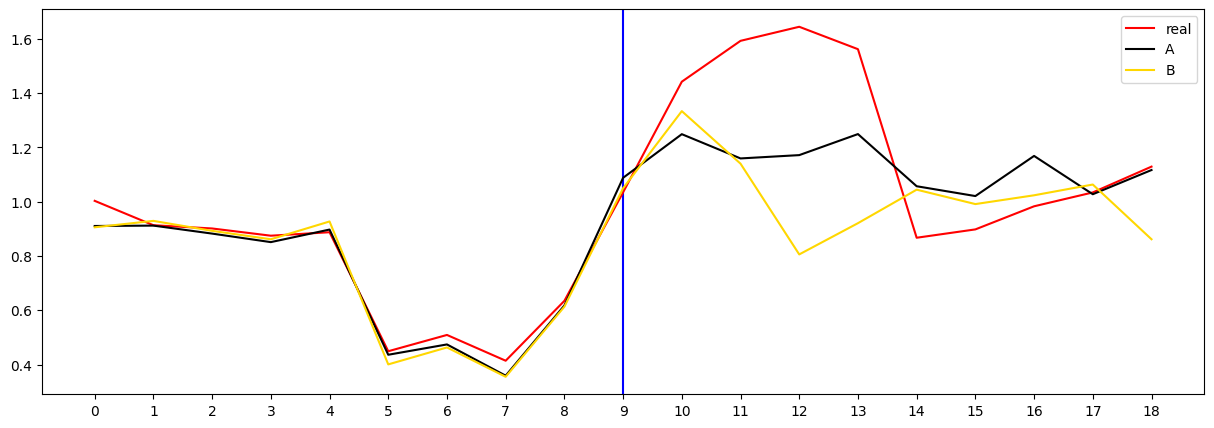

Which prediction is better? (A/B/skip): a
Saved preference.


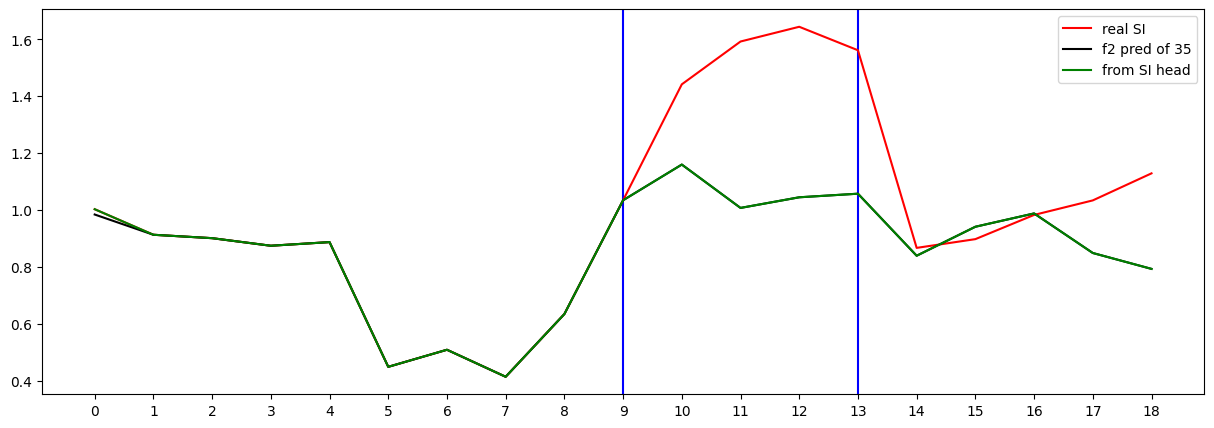

Testing R**2 - (all) - (no inputs):  0.6618116435227543
Testing R**2 - (f2) - SI full (no inputs):  -0.27852045086084254
Testing R**2 - SI head only (no inputs):  -0.27852045086084254
0 ...index R**2 (no inputs):  -0.08780144622265684
1 ...index R**2 (no inputs):  -3.4500864593120637
2 ...index R**2 (no inputs):  -0.27852045086084254
3 ...index R**2 (no inputs):  -0.11260360541264336
4 ...index R**2 (no inputs):  -5.652525398402888
5 ...index R**2 (no inputs):  -0.4899713537893815
6 ...index R**2 (no inputs):  -1175.1660478566396
7 ...index R**2 (no inputs):  -0.14467235402176226
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5370848772908614
10 ...index R**2 (no inputs):  -1.959820631183896
11 ...index R**2 (no inputs):  -779.1616765201248
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.070991558150772
16 ...index R**2 (no inputs):  -0.35818673287159997
17 ...index R**2 (no i

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.330468
Loss_SI: 1.3698385953903198 Loss_all: 1.3237264156341553
===


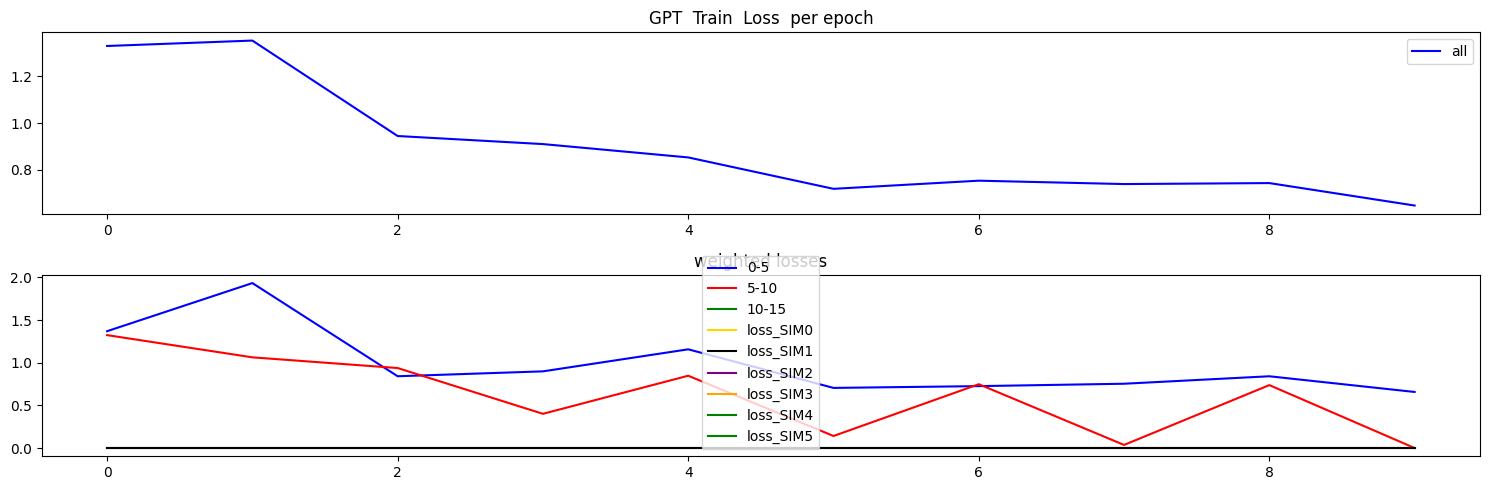

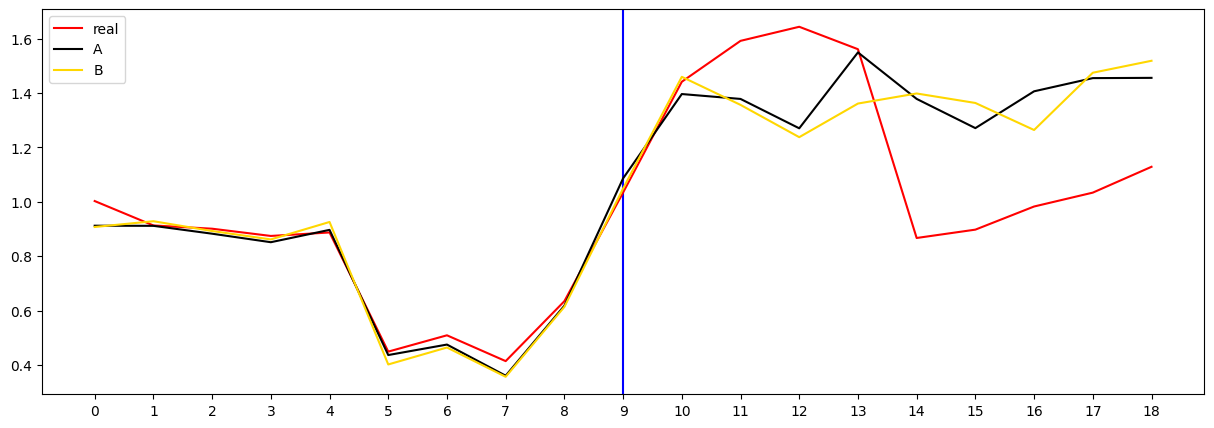

Which prediction is better? (A/B/skip): s


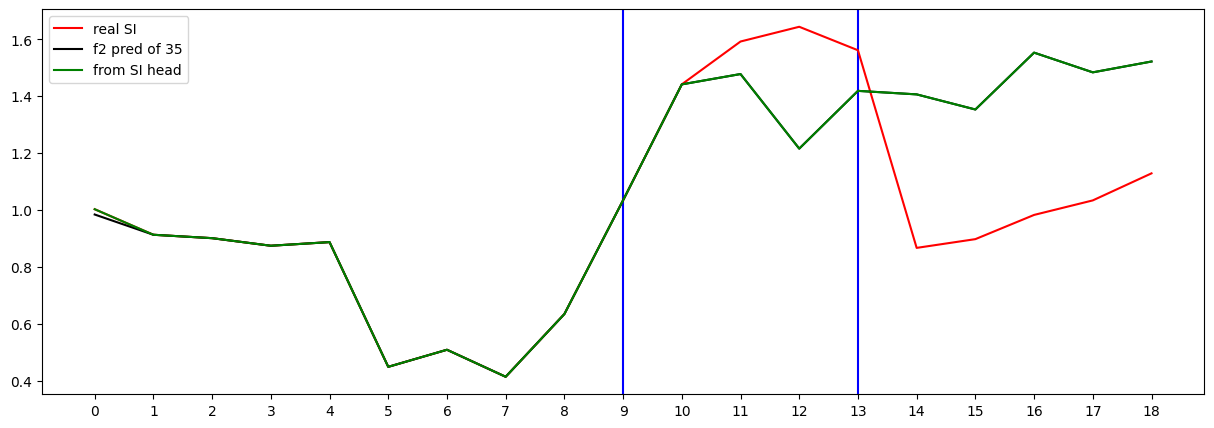

Testing R**2 - (all) - (no inputs):  0.7077633722704708
Testing R**2 - (f2) - SI full (no inputs):  -0.9150705082944994
Testing R**2 - SI head only (no inputs):  -0.9150705082944994
0 ...index R**2 (no inputs):  -0.22741983880312322
1 ...index R**2 (no inputs):  -0.11456548422797685
2 ...index R**2 (no inputs):  -0.9150705082944994
3 ...index R**2 (no inputs):  -0.47262704610601647
4 ...index R**2 (no inputs):  -1.3596890132826767
5 ...index R**2 (no inputs):  -0.3028839333848725
6 ...index R**2 (no inputs):  -5539.418647138682
7 ...index R**2 (no inputs):  -0.21629411660475273
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.4845256360978238
10 ...index R**2 (no inputs):  -0.42171260076679484
11 ...index R**2 (no inputs):  -108.969414662551
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.3820907780757813
16 ...index R**2 (no inputs):  -0.1437124994365062
17 ...index R**2 (no inp

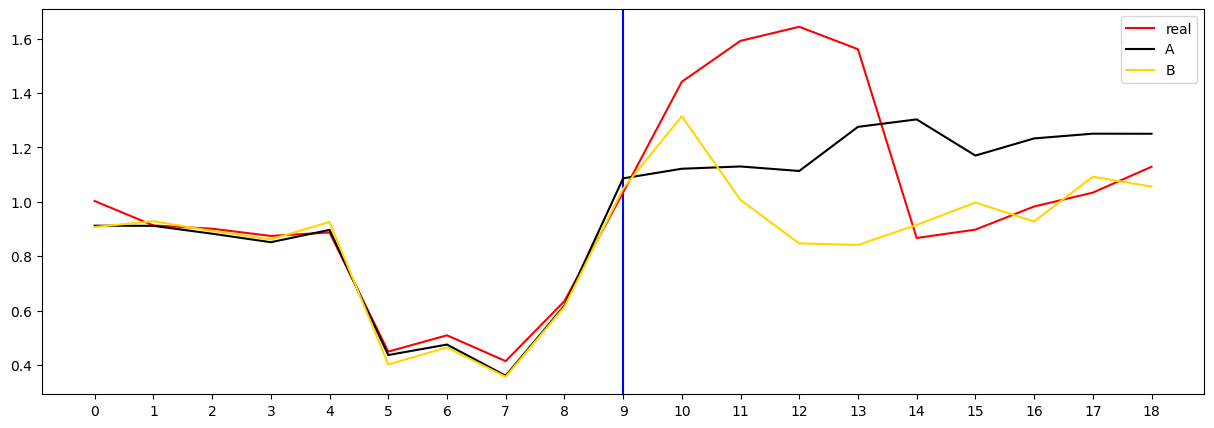

Which prediction is better? (A/B/skip): s


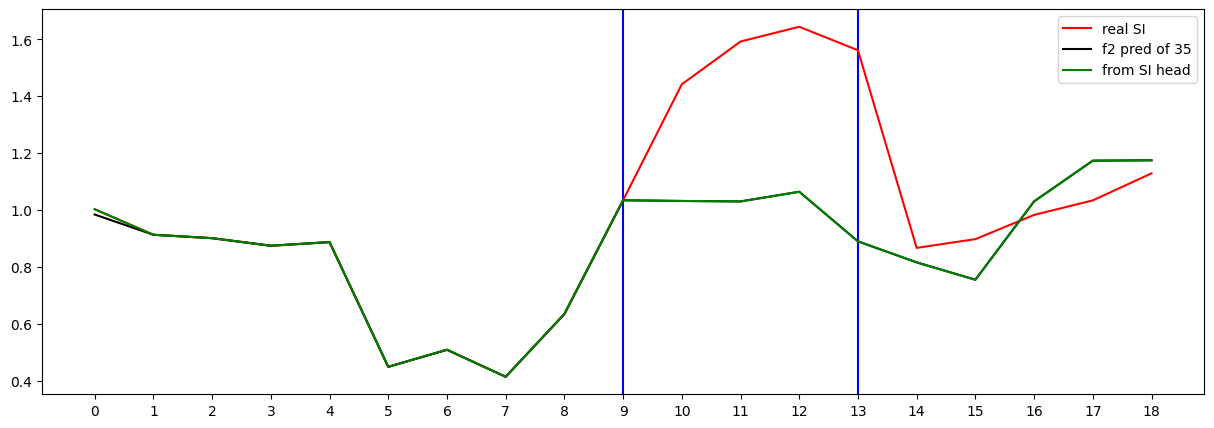

Testing R**2 - (all) - (no inputs):  0.5594352485300396
Testing R**2 - (f2) - SI full (no inputs):  -0.2830580296294025
Testing R**2 - SI head only (no inputs):  -0.2830580296294025
0 ...index R**2 (no inputs):  0.017164602194410072
1 ...index R**2 (no inputs):  -1.4470163088275472
2 ...index R**2 (no inputs):  -0.2830580296294025
3 ...index R**2 (no inputs):  -0.41245576421208097
4 ...index R**2 (no inputs):  -0.2528641082742189
5 ...index R**2 (no inputs):  -0.9967947838976492
6 ...index R**2 (no inputs):  -1750.9659048884262
7 ...index R**2 (no inputs):  -8.483326292020635
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.191564429568515
10 ...index R**2 (no inputs):  -1.5438764625560322
11 ...index R**2 (no inputs):  -181.1299756016447
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.536156151046099
16 ...index R**2 (no inputs):  -0.7860995673019433
17 ...index R**2 (no inputs

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )





## R2 over accumulated Runs


In [44]:

inferenceGPT_obj.print_ALL_R2s_THE_END()


====================================400to500
1 .....................R² on first n steps - R²: 0.7306735103388341
Naive_R2:....................................R²: 0.7906
RMSE:0.2025,MAE:0.1535,MASE:0.3469
1 .......................R² on just step n - R²: 0.7306735103388341
Naive_R2:....................................R²: 0.7906
RMSE:0.2025,MAE:0.1535,MASE:0.3469
2 .....................R² on first n steps - R²: 0.6864695950277134
Naive_R2:....................................R²: 0.6253
RMSE:0.2229,MAE:0.1785,MASE:0.7336
2 .......................R² on just step n - R²: 0.6444636920539341
Naive_R2:....................................R²: 0.7982
RMSE:0.2415,MAE:0.2036,MASE:0.3838
3 .....................R² on first n steps - R²: 0.7181386783226971
Naive_R2:....................................R²: 0.5466
RMSE:0.1961,MAE:0.1491,MASE:0.6414
3 .......................R² on just step n - R²: 0.8026147689593708
Naive_R2:....................................R²: 0.9135
RMSE:0.1264,MAE:0.0903,MASE:0.1870
4

In [45]:

print("End")


End
